# 2 TV SHOWS - EDA <a id='2_TV_SHOWS_-_EDA'></a><a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
    * [2.1 Contents](#2.1_Contents)
    * [2.2 Introduction](#2.2_Introduction)
    * [2.3 Imports](#2.3_Imports)
    * [2.4 Load the Data](#2.4_Load_the_Data)
        * [2.4.1 Load the Series Dataset](#2.4.1_Load_the_Series_Dataset)
        * [2.4.2 Load the Netflix Stocks Dataset](#2.4.2_Load_the_Netflix_Stocks_Dataset)
    * [2.5 Explore the Data](#2.5_Explore_the_Data)
        * [2.5.1 Total Popularity](#2.5.1_Total_Popularity)
        * [2.5.2 Streamers and Their Performance of Popularity](#2.5.2_Streamers_and_Their_Performance_of_Popularity)
        * [2.5.3 Genres](#2.5.3_Genres)
        * [2.5.4 Top 50 Shows](#2.5.4_Top_50_Shows)
        * [2.5.5 Age and its Role in Popularity of the Shows](#2.5.5_Age_and_its_Role_in_Popularity_of_the_Shows)
        * [2.5.6 Countries](#2.5.6_Countries)
        * [2.5.7 Heatmaps (Before and After Pandemic)](#2.5.7_Heatmaps_(Before_and_After_Pandemic))
        * [2.5.8 Running Times](#2.5.8_Running_Times)
        * [2.5.9 Languages](#2.5.9_Languages)
        * [2.5.10 Case Study: Iceland](#2.5.10_Case_Study:_Iceland)
        * [2.5.11 Case Study: France](#2.5.10_Case_Study:_France)
        * [2.5.12 Shows with Creators Also Acting](#2.5.12_Shows_with_Creators_Also_Acting)
    * [2.6 Netflix Show Popularity and its Stock Prices](#2.6_Netflix_Show_Popularity_and_its_Stock_Prices)
    * [2.7 Summary](#2.7_SUMMARY)

## 2.2 Introduction <a id = '2.2_Introduction'><a>

In the data wrangling stage we dropped so many shows compromising the amount of data in order to have as many features as possible.
So in this stage, let's aim to explore as thoroughly as the 53 features.

Besides exploring our master dataset, we'll also take a look at the stock prices of Netflix to see if the poparity numbers we have for the shows correspond with the success rate of the company in the years those shows were released. (Other streamers do either not exist in the stockmarket or own other sources for their business such as Amazon Prime so they can't be good references to see the impact of their shows in assessing their profits.)

## 2.3 Imports <a id = '2.3_Imports'><a>

In [1371]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from library.sb_utils import _save_file
from PIL import Image
import tmdbsimple as tmdb
from imdb import Cinemagoer
# to get api key from your .env file
from dotenv import load_dotenv
from pathlib import Path


## 2.4 Load the Data <a id ='2.4_Load_the_Data'><a>

## 2.4.1 Load the Series Dataset <a id= '2.4.1_Load_the_Series_Dataset'><a>

In [1372]:
tv_data = pd.read_csv('datasets/series_DF.csv', index_col=False, low_memory=False)
tv_df = pd.DataFrame(tv_data)
tv_df.head()

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
0,1856010,1425,House of Cards,tvSeries,2013,2018,Netflix,18,Drama,Drama,...,US,35.6,26.5,Robin Wright,Michael Kelly,31.0,7.6,8.6,525135,5.76
1,2309295,42295,Hemlock Grove,tvSeries,2013,2015,Netflix,18,Drama,Fantasy,...,US,18.5,58.3,Landon Liboiron,Bill Skarsgård,38.4,2.4,7.0,42205,4.58
2,2372162,1424,Orange Is the New Black,tvSeries,2013,2019,Netflix,18,Comedy,Crime,...,US,28.4,12.3,Taylor Schilling,Natasha Lyonne,20.4,3.7,8.0,316768,5.32
3,2189461,60699,Marco Polo,tvSeries,2014,2016,Netflix,18,Action,Adventure,...,US,18.3,24.4,Lorenzo Richelmy,Benedict Wong,21.4,2.2,8.0,77293,5.04
4,3520702,61986,Bloodline,tvSeries,2015,2017,Netflix,18,Drama,Thriller,...,US,34.3,32.8,Kyle Chandler,Linda Cardellini,33.6,2.1,7.9,57529,5.01


In [1373]:
tv_df['first_country'].unique()

array(['US', 'GB', 'AU', 'CA', 'ZA', 'IL', 'JP', 'FR', 'DE', 'ES', 'BE',
       'BR', 'MX', 'KR', 'JO', 'DK', 'NL', 'IN', 'IT', 'TW', 'NO', 'PL',
       'AR', 'CO', 'SE', 'TH', 'TR', 'NZ', 'IS', 'AT', 'NG', 'PH', 'VN',
       'EG', 'SA', 'CL', 'KE', 'PE', 'ID', 'PT', 'FI', 'SG', 'IE', 'CZ',
       'CN', 'PR', 'HK'], dtype=object)

In [1374]:
tv_df.columns

Index(['imdb_id', 'tmdb_id', 'Title', 'titleType', 'startYear', 'endYear',
       'Streamer', 'Age', 'genre_1', 'genre_2', 'creator/actor?',
       'origin_language', 'director_1_name', 'director_2_name',
       'originalTitle', 'writer_1_imdb#', 'writer_2_imdb#', 'writer_3_imdb#',
       'director_1_imdb#', 'director_2_imdb#', 'director_3_imdb#',
       'director_3_name', 'writer_1_name', 'writer_2_name', 'writer_3_name',
       'ep_run_times', 'writer_1_pop', 'writer_2_pop', 'writer_3_pop',
       'director_1_pop', 'director_2_pop', 'director_3_pop', 'tmdb_popularity',
       'no_of_ep', 'no_of_seasons', 'first_country', 'second_country',
       'actor_1_pop', 'actor_2_pop', 'actor_1_name', 'actor_2_name',
       'cast_pop', 'team_popularity', 'imdb_rating', 'imdb_no_votes',
       'total_popularity'],
      dtype='object')

## 2.4.2 Load the Netflix Stocks Dataset <a id= '2.4.2_Load_the_Netflix_Stocks_Dataset'><a>

In [1375]:
netflix_stocks = pd.read_csv('datasets/NFLX-stocks.csv')
n_stocks_df = pd.DataFrame(netflix_stocks)
n_stocks_df.head(61)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,259.279999,358.850006,256.579987,339.500000,339.500000,306616400
1,2019-02-01,337.179993,371.489990,336.500000,358.100006,358.100006,148192100
2,2019-03-01,362.260010,379.000000,342.470001,356.559998,356.559998,144843100
3,2019-04-01,359.000000,384.799988,342.269989,370.540009,370.540009,165079400
4,2019-05-01,374.000000,385.989990,341.390015,343.279999,343.279999,125298300
...,...,...,...,...,...,...,...
56,2023-09-01,437.730011,453.450012,371.100006,377.600006,377.600006,100278600
57,2023-10-01,377.480011,418.839996,344.730011,411.690002,411.690002,164021900
58,2023-11-01,414.769989,482.700012,414.179993,473.970001,473.970001,71741400
59,2023-12-01,473.170013,500.890015,445.730011,486.880005,486.880005,80411900


## 2.5 Explore the Data <a id= '2.5_Explore_the_Data'><a>

## 2.5.1 Total Popularity <a id='2.5.1_Total_Popularity'><a>

Text(0, 0.5, 'Total Popular')

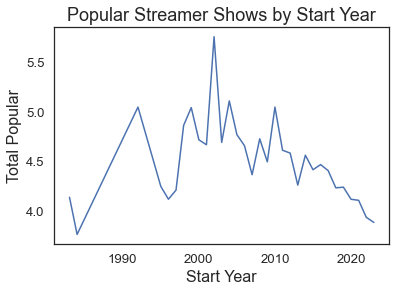

In [1376]:
#taking the average popularity of shows for each start year
popularity_by_year = tv_df.groupby('startYear')['total_popularity'].mean()
popularity_by_year.plot()
plt.title("Popular Streamer Shows by Start Year",fontsize=18)
plt.xlabel("Start Year",fontsize=16)
plt.ylabel("Total Popular",fontsize=16)

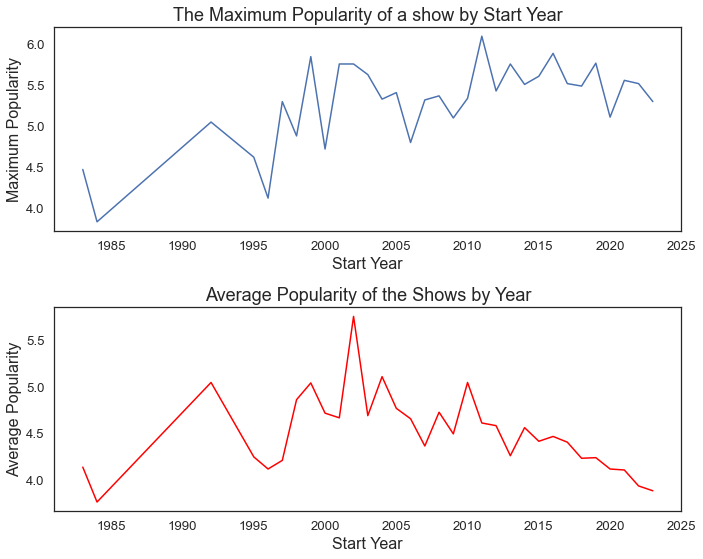

In [1377]:
max_popularity_by_year = tv_df.groupby('startYear')['total_popularity'].max()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))


max_popularity_by_year.plot(ax = ax1)
ax1.set_xlabel("Start Year",fontsize=16)
ax1.set_ylabel("Maximum Popularity",fontsize=16)
ax1.set_title("The Maximum Popularity of a show by Start Year" ,fontsize=18)

ave_popularity_by_year = tv_df.groupby('startYear')['total_popularity'].mean()
ave_popularity_by_year.plot(ax = ax2, color = 'red')
ax2.set_xlabel("Start Year",fontsize=16)
ax2.set_ylabel("Average Popularity",fontsize=16)
ax2.set_title("Average Popularity of the Shows by Year",fontsize=18)
plt.tight_layout()
plt.show()


We can clearly see that there is a big decline in the popularity number of the shows overall in the recent years. Nevertheless, the highest popularity happened after 2010.

In [1378]:
tv_df.sort_values(by = 'total_popularity', ascending = False).head()

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
994,944947,1399,Game of Thrones,tvSeries,2011,2019,HBO(Max),18,Action,Adventure,...,US,42.5,29.8,Peter Dinklage,Kit Harington,36.2,6.1,9.2,2237514,6.10
425,4574334,66732,Stranger Things,tvSeries,2016,2025,Netflix,14,Drama,Fantasy,...,US,71.8,23.9,Millie Bobby Brown,David Harbour,47.8,2.7,8.7,1301692,5.89
980,141842,1398,The Sopranos,tvSeries,1999,2007,HBO(Max),18,Crime,Drama,...,US,23.6,17.1,James Gandolfini,Edie Falco,20.4,5.6,9.2,452111,5.85
953,1190634,76479,The Boys,tvSeries,2019,0,Prime,18,Action,Comedy,...,US,57.3,36.8,Karl Urban,Jack Quaid,47.1,4.0,8.7,616258,5.77
1049,185906,4613,Band of Brothers,tvMiniSeries,2001,2001,HBO(Max),18,Drama,History,...,US,34.4,43.3,Damian Lewis,Donnie Wahlberg,38.8,5.2,9.4,510054,5.76


The highest popularity number belongs to Game of Thrones by HBO, which means cable tv shows still beat streamer shows. However the next one, Netflix. Does that mean Netflix's strategy of producing as many shows as possible will guarantee the most popular show, or HBO is the best because they know about quality of a good show story and hence they lead the way? Should Gaumont pursue Netflix because it has a higher chance of greenlighting their project and it is a company with thousands of productions under its belt. Or should they pursue  HBO(Max) -  which has a harder rate of greenlight but it is worth the pursuit cuz they can develop great shows with the producers?

Examining this with barplot - the last 10 years of popularity

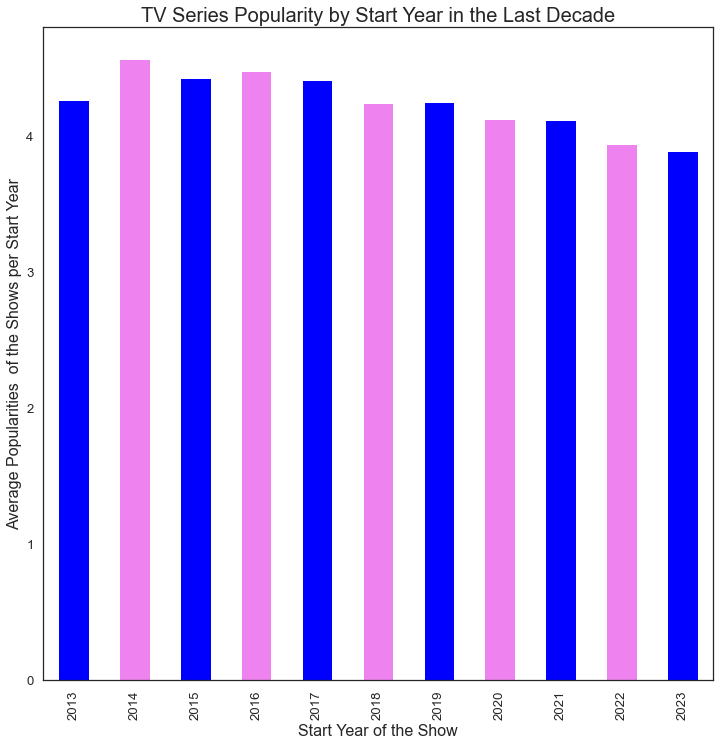

In [1379]:
ave_popularity_by_year[21:].plot(kind="bar",
        figsize=(12,12),
        color=['blue', 'violet'])
plt.title("TV Series Popularity by Start Year in the Last Decade",fontsize=20)
plt.xlabel("Start Year of the Show",fontsize=16)
plt.ylabel("Average Popularities  of the Shows per Start Year",fontsize=16)
plt.show()

Popularity of shows released in 2020 and 2021 are almost equal. So the shows made during the pandemic reached the same popularity of the shows which were produced before pandemic and released during pandemic in 2020.

Interstingly shows that began earlier tend me more popular than shows released in the last two years. Post-pandemic popularity seems to be off.

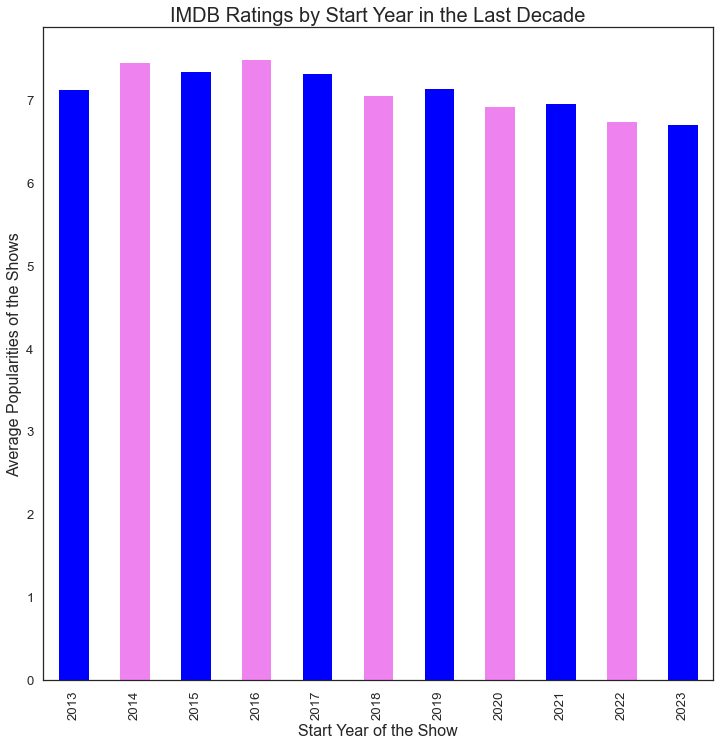

In [1380]:
#Let's do the same thing with imdb_ratings only to see if they differ.
imdb_rating_by_year = tv_df.groupby('startYear')['imdb_rating'].mean()
imdb_rating_by_year[21:].plot(kind="bar",
        figsize=(12,12),
        color=['blue', 'violet'])
plt.title("IMDB Ratings by Start Year in the Last Decade",fontsize=20)
plt.xlabel("Start Year of the Show",fontsize=16)
plt.ylabel("Average Popularities of the Shows",fontsize=16)
plt.show()

This is quite similar with the total popularity feature.

<AxesSubplot:xlabel='startYear'>

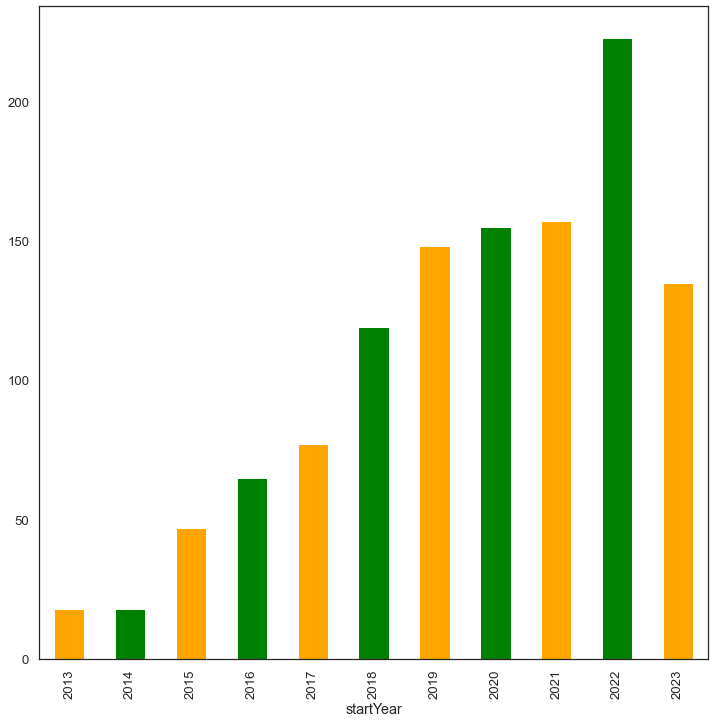

In [1381]:
shows_per_year = tv_df.groupby('startYear')['startYear'].count()
shows_per_year[21:].plot(kind="bar",
        figsize=(12,12),
        color= ['orange', 'green'])

Post-pandemic, there was a huge rise in number of shows made.

## 2.5.2 Streamers and Their Performance of Popularity <a id= '2.5.2_Streamers_and_Their_Performance_of_Popularity'><a>

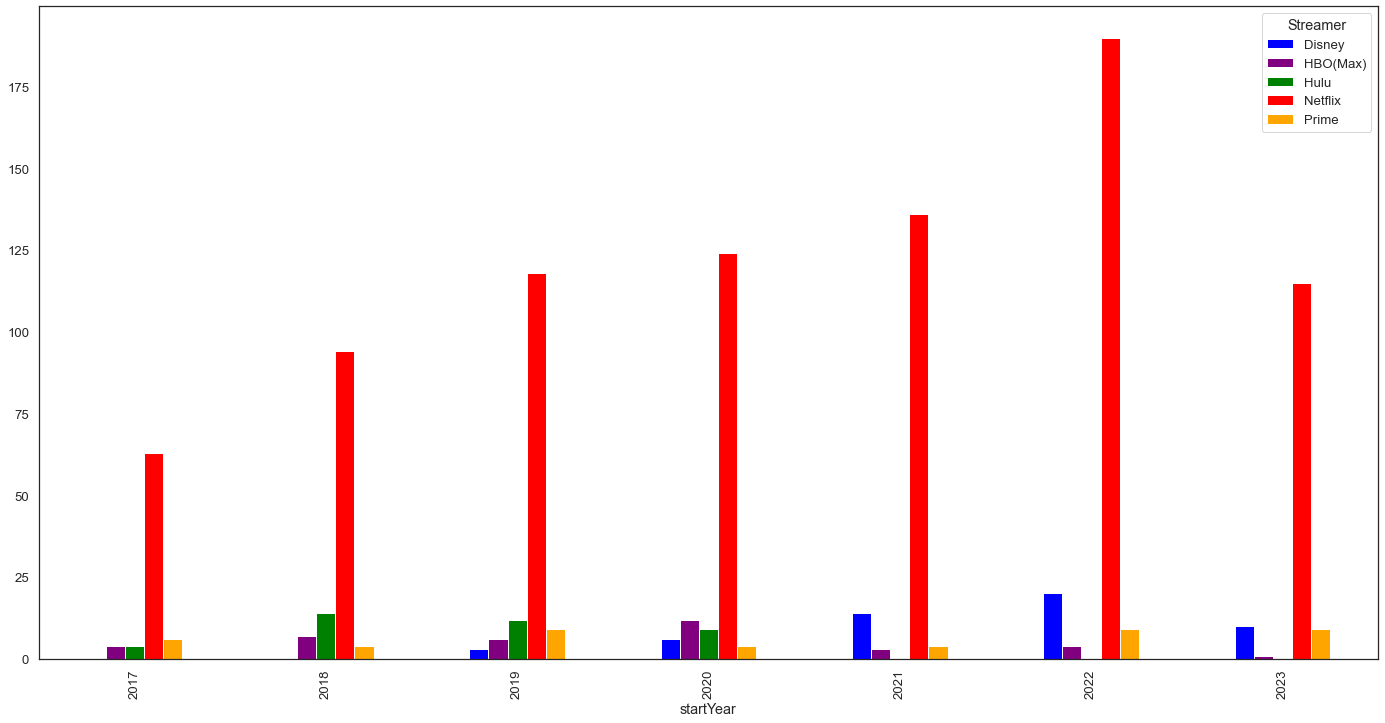

In [1382]:
df = pd.crosstab(tv_df['startYear'], tv_df['Streamer'])

sns.set_style("white")

df[25:].plot(kind="bar",
        figsize=(24,12),
        color=['blue', 'purple', 'green', 'red', 'orange' ]);


Netflix has a crazy big ball game in terms of numbers of shows produced. And together with Disney and HBO(Max) it tried hard to come out of pandemic strong with number of shows.

Let's see if that's equivalent when it comes to popularity of the shows - I doubt it...

<AxesSubplot:xlabel='Streamer'>

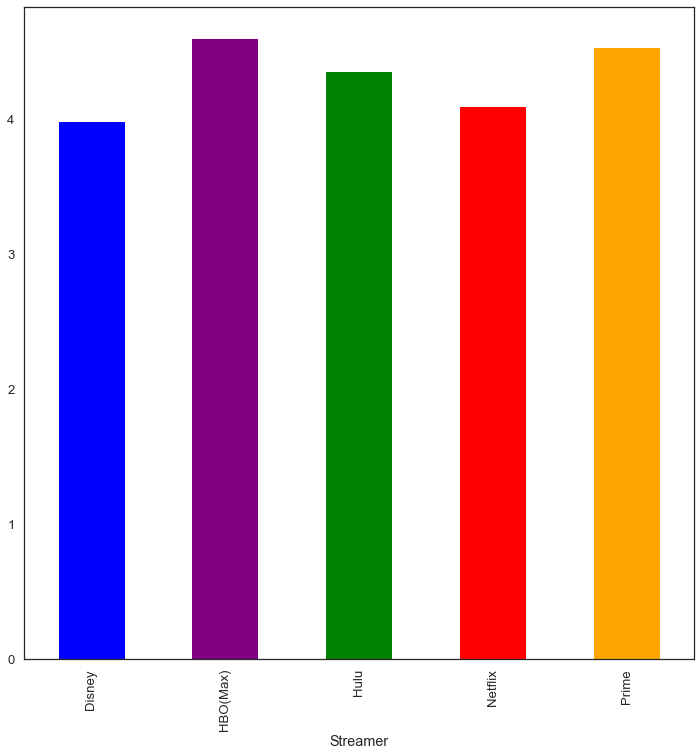

In [1383]:
streamers_per_year = tv_df.groupby('Streamer')['total_popularity'].mean()
streamers_per_year.plot(kind="bar",
        figsize=(12,12),
        color= ['blue', 'purple', 'green', 'red', 'orange' ])


HBO(Max) and Prime lead in the category of the most popular shows. Disney comes last. 

## 2.5.3 Genres <a id= '2.5.3_Genres'><a>

<AxesSubplot:xlabel='genre_1'>

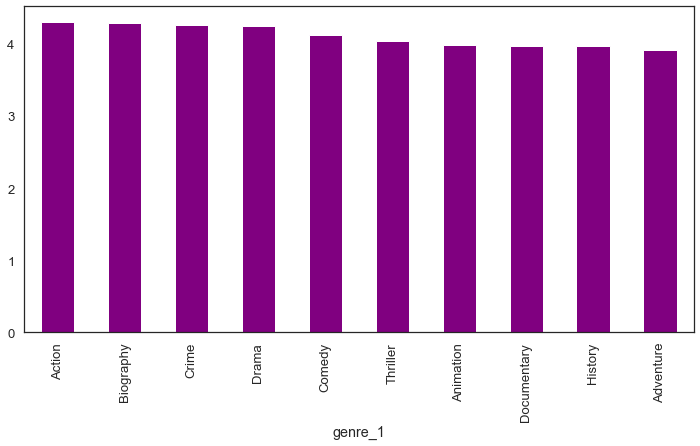

In [1384]:
streamers_per_year = tv_df.groupby('genre_1')['total_popularity'].mean().nlargest(10)
streamers_per_year.plot(kind="bar",
        figsize=(12,6),
        color= 'purple')

Action, Biography, Crime and Drama are the frontrunners when it comes to popularity

Let's see how they differed in the last 4 years.

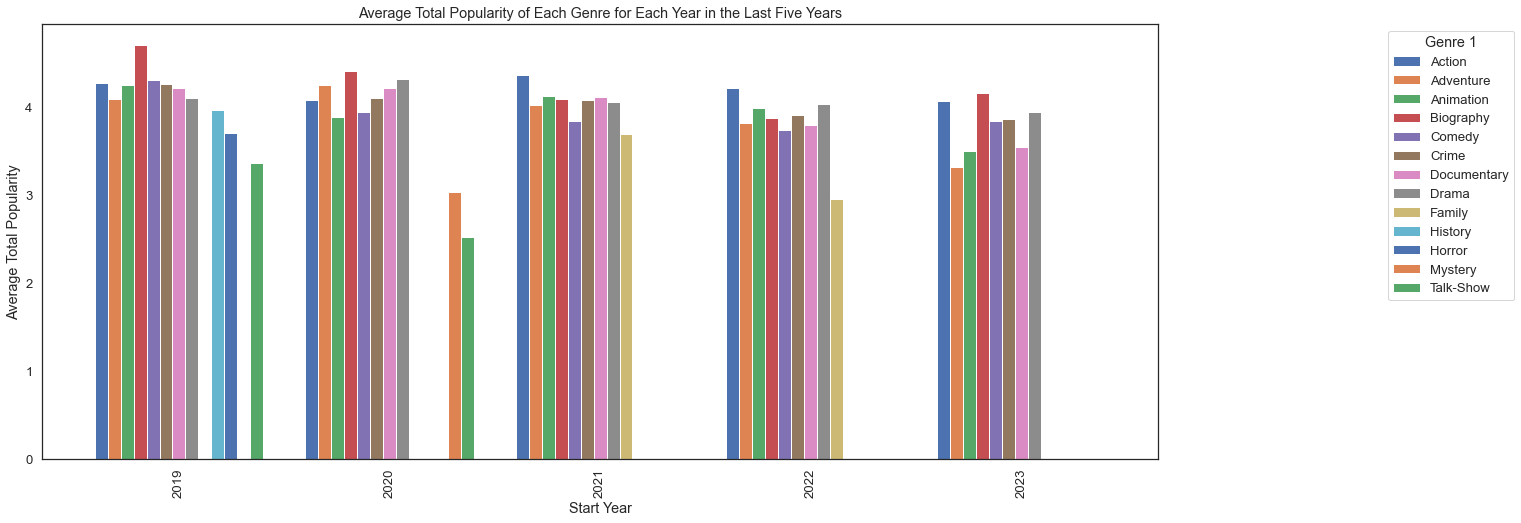

In [1385]:

genre_1_column = 'genre_1'

# Filter the dataset for the last four years
last_five_years = tv_df[tv_df['startYear'] >= tv_df['startYear'].max() - 4]
# Group by 'year' and 'genre', then calculate the average total_popularity
average_popularity_by_genre_1_year = last_five_years.groupby(['startYear', genre_1_column])['total_popularity'].mean().reset_index()

# Pivoting the table 
pivot_table = average_popularity_by_genre_1_year.pivot(index='startYear', columns=genre_1_column, values='total_popularity')

# Plot the bar plot
pivot_table.plot(kind='bar', figsize=(20, 8), width = 0.8)
plt.xlabel('Start Year')
plt.ylabel('Average Total Popularity')
plt.title('Average Total Popularity of Each Genre for Each Year in the Last Five Years')
plt.legend(title='Genre 1', bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

Crime is a genre with the most constant popularity numbers throughout the years, pandemic didn't affect it so much either. The genre of action became more popular during pandemic, and the genre of 'Biography' is very powerful although it was popular less during pandemic. Let's check Genre_2

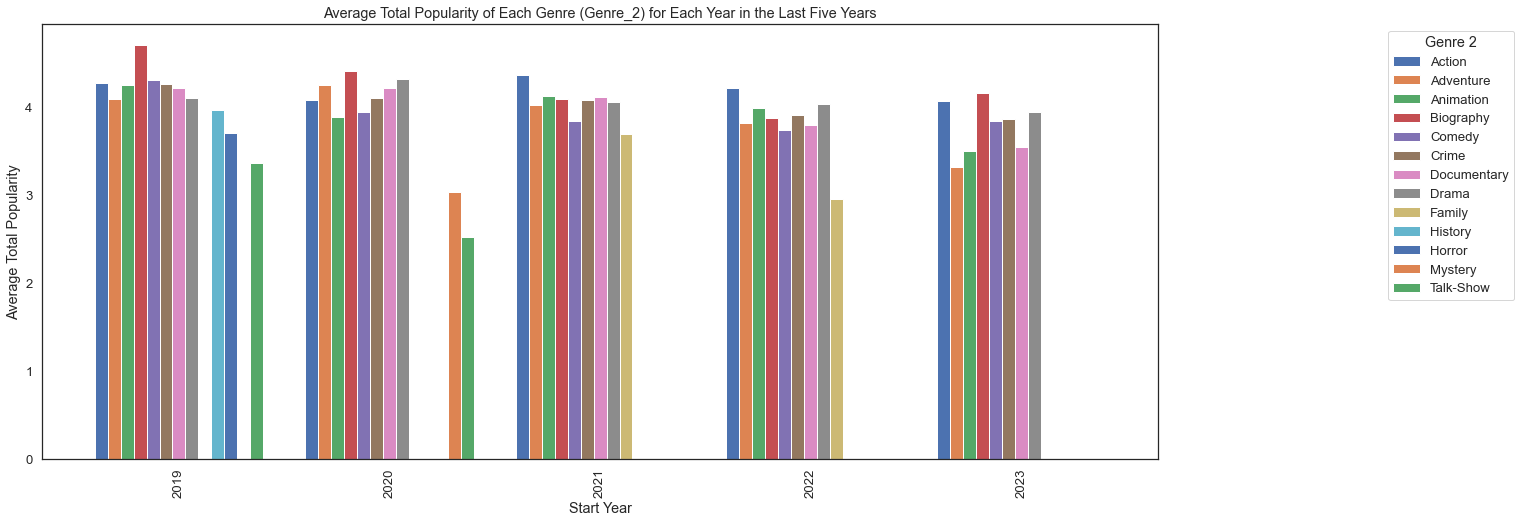

In [1386]:
genre_2_column = 'genre_2'

# Group by 'year' and 'genre', then calculate the average total_popularity
average_popularity_by_genre_2_year = last_five_years.groupby(['startYear', genre_2_column])['total_popularity'].mean().reset_index()

pivot_table_2 = average_popularity_by_genre_2_year.pivot(index='startYear', columns=genre_2_column, values='total_popularity')

# Plot
pivot_table.plot(kind='bar', figsize=(20, 8), width = 0.8)
plt.xlabel('Start Year')
plt.ylabel('Average Total Popularity')
plt.title('Average Total Popularity of Each Genre (Genre_2) for Each Year in the Last Five Years')
plt.legend(title='Genre 2', bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

Genre_2 looks similar. 

In [1387]:
Top_50 = tv_df.sort_values(by = 'total_popularity', ascending = False).iloc[:50]
Top_50['genre'] = Top_50['genre_1'] +" / " + Top_50['genre_2']
Top_50['genre']

994     Action / Adventure
425        Drama / Fantasy
980          Crime / Drama
953        Action / Comedy
1049       Drama / History
0            Drama / Drama
982          Crime / Drama
952     Action / Adventure
999        Drama / Mystery
1154    Action / Adventure
417        Comedy / Comedy
5           Action / Crime
7        Biography / Crime
426      Biography / Drama
974     Action / Adventure
588     Action / Adventure
423          Crime / Drama
221          Crime / Drama
956         Action / Crime
138     Animation / Comedy
906          Crime / Drama
1157    Action / Adventure
578        Action / Comedy
18           Crime / Drama
950        Drama / Mystery
412         Action / Crime
427          Crime / Drama
19          Action / Crime
938         Comedy / Drama
996          Drama / Drama
433     Action / Adventure
1031       Comedy / Comedy
985         Action / Drama
759         Comedy / Crime
981         Comedy / Drama
1099        Drama / Sci-Fi
124      Biography / Crime
1

<AxesSubplot:xlabel='genre'>

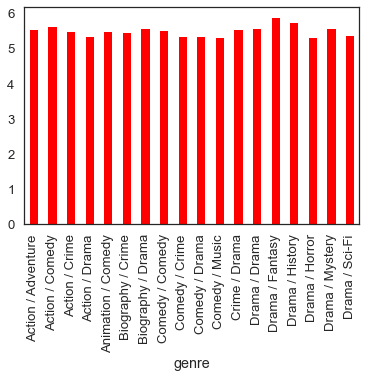

In [1388]:
Top50_genre_comb = Top_50.groupby('genre')['total_popularity'].mean()
Top50_genre_comb.plot(kind = 'bar', color = 'red')


Drama/History and Drama/Fantasy are winning genre combinations which also sometimes respond to the viewers' need for the genres 'Action' and 'Biography' through the show's subplots.

## 2.5.4 Top 50 Shows <a id= '2.5.4_Top_50_Shows'><a>

In [1389]:
Top_50 = tv_df.sort_values(by = 'total_popularity', ascending = False)[:50]
Top_50

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
994,944947,1399,Game of Thrones,tvSeries,2011,2019,HBO(Max),18,Action,Adventure,...,US,42.5,29.8,Peter Dinklage,Kit Harington,36.2,6.1,9.2,2237514,6.10
425,4574334,66732,Stranger Things,tvSeries,2016,2025,Netflix,14,Drama,Fantasy,...,US,71.8,23.9,Millie Bobby Brown,David Harbour,47.8,2.7,8.7,1301692,5.89
980,141842,1398,The Sopranos,tvSeries,1999,2007,HBO(Max),18,Crime,Drama,...,US,23.6,17.1,James Gandolfini,Edie Falco,20.4,5.6,9.2,452111,5.85
953,1190634,76479,The Boys,tvSeries,2019,0,Prime,18,Action,Comedy,...,US,57.3,36.8,Karl Urban,Jack Quaid,47.1,4.0,8.7,616258,5.77
1049,185906,4613,Band of Brothers,tvMiniSeries,2001,2001,HBO(Max),18,Drama,History,...,US,34.4,43.3,Damian Lewis,Donnie Wahlberg,38.8,5.2,9.4,510054,5.76
0,1856010,1425,House of Cards,tvSeries,2013,2018,Netflix,18,Drama,Drama,...,US,35.6,26.5,Robin Wright,Michael Kelly,31.0,7.6,8.6,525135,5.76
982,306414,1438,The Wire,tvSeries,2002,2008,HBO(Max),18,Crime,Drama,...,US,25.2,27.1,Dominic West,Lance Reddick,26.1,3.7,9.3,368086,5.76
952,2306299,44217,Vikings,tvSeries,2013,2020,Prime,18,Action,Adventure,...,CA,40.5,31.5,Alex Høgh Andersen,Jordan Patrick Smith,36.0,2.8,8.5,569864,5.73
999,475784,63247,Westworld,tvSeries,2016,2022,HBO(Max),18,Drama,Mystery,...,US,66.3,32.3,Evan Rachel Wood,Thandiwe Newton,49.3,7.7,8.5,526182,5.72
1154,8111088,82856,The Mandalorian,tvSeries,2019,0,Disney,14,Action,Adventure,...,US,128.3,31.0,Pedro Pascal,Katee Sackhoff,79.7,14.7,8.7,571733,5.64


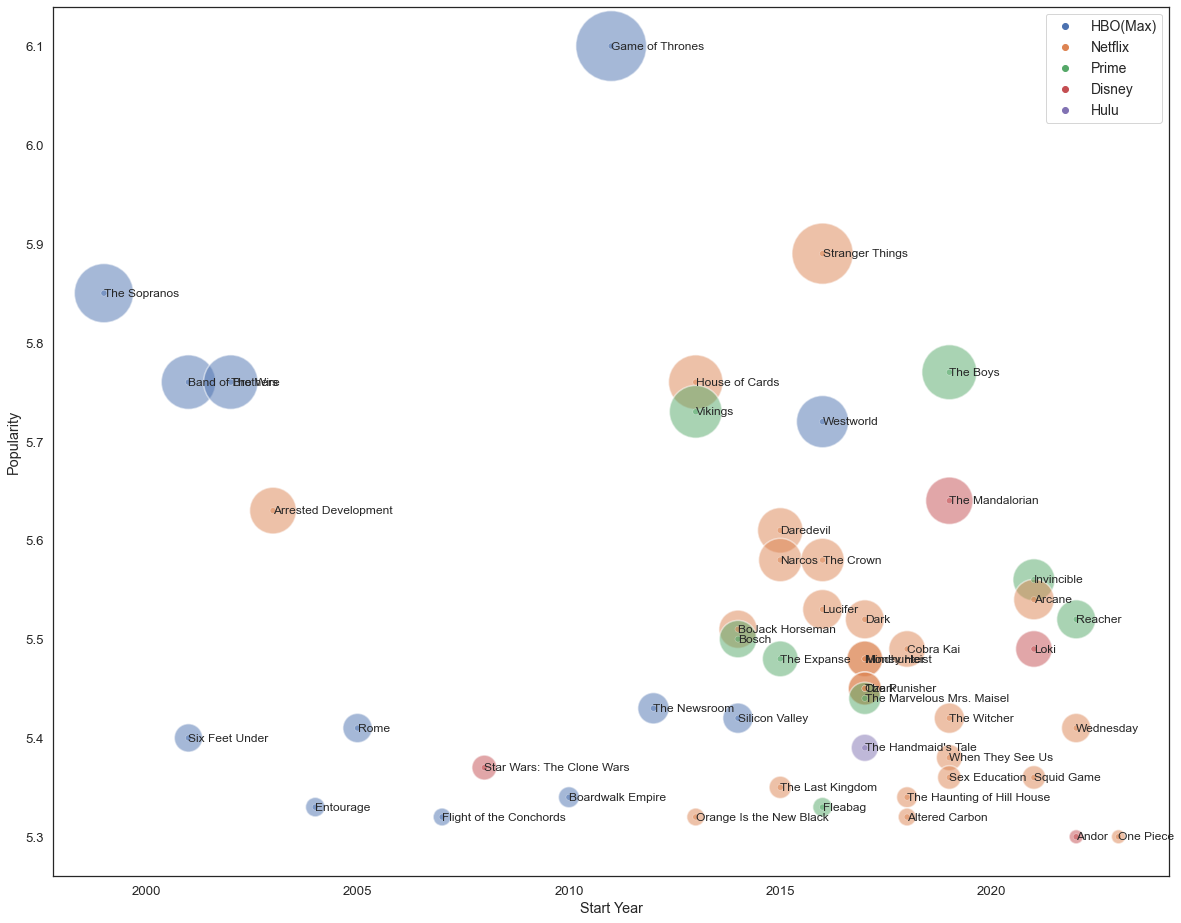

In [1390]:
plt.figure(figsize=(20,16))

ax = sns.scatterplot(data=Top_50, x='startYear', y='total_popularity', 
                     size = 'total_popularity', sizes = (200, 5000), alpha = 0.5,
                     hue='Streamer', legend = False)

ax2 = sns.scatterplot(data=Top_50, x='startYear', y='total_popularity', 
                      alpha = 0.5,
                     hue='Streamer')
shows = Top_50['Title'].tolist()
years1 = Top_50['startYear'].tolist()
popular1 = Top_50['total_popularity'].tolist()

ax.legend(fontsize=14)
ax.set_xlabel('Start Year')
ax.set_ylabel('Popularity')

for i, txt in enumerate(shows):
    ax.text(years1[i], popular1[i], txt, ha='left', va='center', fontsize = 12)




Half of the top 10 shows are made by HBO when it was only a cable network. This followed by Netflix and Prime. Although Arrested Development is under Netflix it was created and first run by Fox TV. So that doesn't really count. However, overall, Netflix has more popular shows.

Now checking correlation between Age ratings and popularity. Checking Age Ratings

## 2.5.5 Age and its Role in Popularity of the Shows <a id= '2.5.5_Age_and_its_Role_in_Popularity_of_the_Shows' ><a>

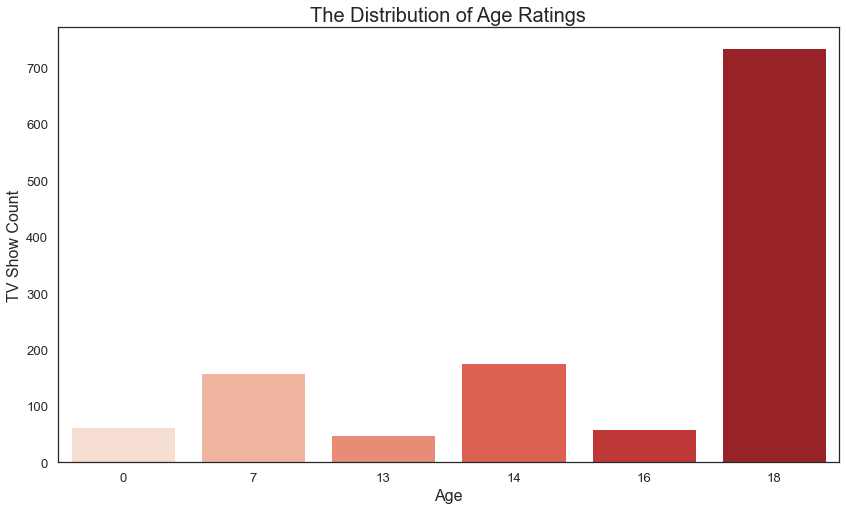

In [1391]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=tv_df["Age"],
              palette='Reds')


plt.title("The Distribution of Age Ratings",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("TV Show Count",fontsize=16)
plt.show()

Very interestingly, the most popular shows have mature audience requirements. Perhaps that's how streamers were able to stand out early on when the Cable and Free TV were big deals. 

Total Popularity by Age

<Figure size 864x576 with 0 Axes>

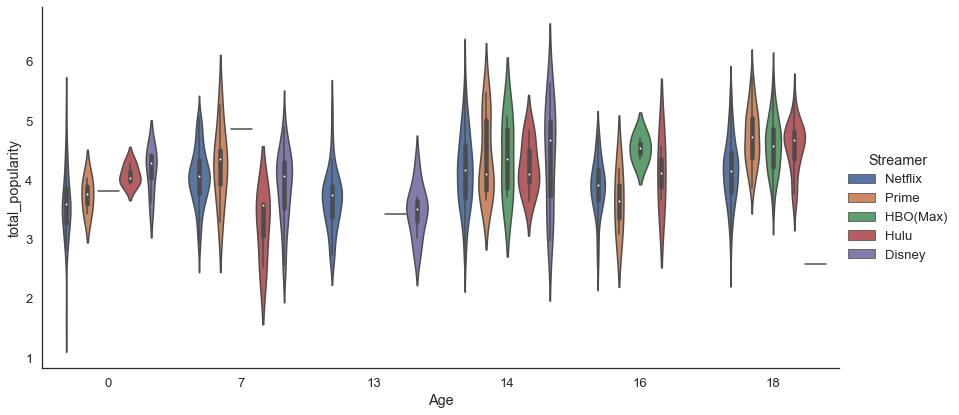

In [1392]:
last_ten_years = tv_df[tv_df['startYear'] >= tv_df['startYear'].max() - 9]
plt.figure(figsize=(12, 8))
sns.catplot(
    data=last_ten_years, x="Age", y="total_popularity", hue="Streamer", kind="violin",height=6, aspect=2

)
plt.show()


While HBO seems not interested in content that is not appropriate for people under fourteen, Prime and Netflix tries to aim all ages. Disney on the other hand, tries not to create a content that is only suitable for people above 18.

## 2.5.6 Countries <a id = '2.5.6_Countries'><a>

Let's see if we can have a chart with the world map to see the distribution of shows across the world.

In [1440]:
# install the necessary library
!pip install geopandas matplotlib


In [1394]:
#importing the necessary world map
import geopandas as gpd


In [1395]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_15269/2073187333.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [1396]:
#dictionary for converting two letter abbreviations to three letter
convert_ISO_3166_2_to_1 = {
'AF':'AFG',
'AX':'ALA',
'AL':'ALB',
'DZ':'DZA',
'AS':'ASM',
'AD':'AND',
'AO':'AGO',
'AI':'AIA',
'AQ':'ATA',
'AG':'ATG',
'AR':'ARG',
'AM':'ARM',
'AW':'ABW',
'AU':'AUS',
'AT':'AUT',
'AZ':'AZE',
'BS':'BHS',
'BH':'BHR',
'BD':'BGD',
'BB':'BRB',
'BY':'BLR',
'BE':'BEL',
'BZ':'BLZ',
'BJ':'BEN',
'BM':'BMU',
'BT':'BTN',
'BO':'BOL',
'BA':'BIH',
'BW':'BWA',
'BV':'BVT',
'BR':'BRA',
'IO':'IOT',
'BN':'BRN',
'BG':'BGR',
'BF':'BFA',
'BI':'BDI',
'KH':'KHM',
'CM':'CMR',
'CA':'CAN',
'CV':'CPV',
'KY':'CYM',
'CF':'CAF',
'TD':'TCD',
'CL':'CHL',
'CN':'CHN',
'CX':'CXR',
'CC':'CCK',
'CO':'COL',
'KM':'COM',
'CG':'COG',
'CD':'COD',
'CK':'COK',
'CR':'CRI',
'CI':'CIV',
'HR':'HRV',
'CU':'CUB',
'CY':'CYP',
'CZ':'CZE',
'DK':'DNK',
'DJ':'DJI',
'DM':'DMA',
'DO':'DOM',
'EC':'ECU',
'EG':'EGY',
'SV':'SLV',
'GQ':'GNQ',
'ER':'ERI',
'EE':'EST',
'ET':'ETH',
'FK':'FLK',
'FO':'FRO',
'FJ':'FJI',
'FI':'FIN',
'FR':'FRA',
'GF':'GUF',
'PF':'PYF',
'TF':'ATF',
'GA':'GAB',
'GM':'GMB',
'GE':'GEO',
'DE':'DEU',
'GH':'GHA',
'GI':'GIB',
'GR':'GRC',
'GL':'GRL',
'GD':'GRD',
'GP':'GLP',
'GU':'GUM',
'GT':'GTM',
'GG':'GGY',
'GN':'GIN',
'GW':'GNB',
'GY':'GUY',
'HT':'HTI',
'HM':'HMD',
'VA':'VAT',
'HN':'HND',
'HK':'HKG',
'HU':'HUN',
'IS':'ISL',
'IN':'IND',
'ID':'IDN',
'IR':'IRN',
'IQ':'IRQ',
'IE':'IRL',
'IM':'IMN',
'IL':'ISR',
'IT':'ITA',
'JM':'JAM',
'JP':'JPN',
'JE':'JEY',
'JO':'JOR',
'KZ':'KAZ',
'KE':'KEN',
'KI':'KIR',
'KP':'PRK',
'KR':'KOR',
'KW':'KWT',
'KG':'KGZ',
'LA':'LAO',
'LV':'LVA',
'LB':'LBN',
'LS':'LSO',
'LR':'LBR',
'LY':'LBY',
'LI':'LIE',
'LT':'LTU',
'LU':'LUX',
'MO':'MAC',
'MK':'MKD',
'MG':'MDG',
'MW':'MWI',
'MY':'MYS',
'MV':'MDV',
'ML':'MLI',
'MT':'MLT',
'MH':'MHL',
'MQ':'MTQ',
'MR':'MRT',
'MU':'MUS',
'YT':'MYT',
'MX':'MEX',
'FM':'FSM',
'MD':'MDA',
'MC':'MCO',
'MN':'MNG',
'ME':'MNE',
'MS':'MSR',
'MA':'MAR',
'MZ':'MOZ',
'MM':'MMR',
'NA':'NAM',
'NR':'NRU',
'NP':'NPL',
'NL':'NLD',
'AN':'ANT',
'NC':'NCL',
'NZ':'NZL',
'NI':'NIC',
'NE':'NER',
'NG':'NGA',
'NU':'NIU',
'NF':'NFK',
'MP':'MNP',
'NO':'NOR',
'OM':'OMN',
'PK':'PAK',
'PW':'PLW',
'PS':'PSE',
'PA':'PAN',
'PG':'PNG',
'PY':'PRY',
'PE':'PER',
'PH':'PHL',
'PN':'PCN',
'PL':'POL',
'PT':'PRT',
'PR':'PRI',
'QA':'QAT',
'RE':'REU',
'RO':'ROU',
'RU':'RUS',
'RW':'RWA',
'BL':'BLM',
'SH':'SHN',
'KN':'KNA',
'LC':'LCA',
'MF':'MAF',
'PM':'SPM',
'VC':'VCT',
'WS':'WSM',
'SM':'SMR',
'ST':'STP',
'SA':'SAU',
'SN':'SEN',
'RS':'SRB',
'SC':'SYC',
'SL':'SLE',
'SG':'SGP',
'SK':'SVK',
'SI':'SVN',
'SB':'SLB',
'SO':'SOM',
'ZA':'ZAF',
'GS':'SGS',
'ES':'ESP',
'LK':'LKA',
'SD':'SDN',
'SR':'SUR',
'SJ':'SJM',
'SZ':'SWZ',
'SE':'SWE',
'CH':'CHE',
'SY':'SYR',
'TW':'TWN',
'TJ':'TJK',
'TZ':'TZA',
'TH':'THA',
'TL':'TLS',
'TG':'TGO',
'TK':'TKL',
'TO':'TON',
'TT':'TTO',
'TN':'TUN',
'TR':'TUR',
'TM':'TKM',
'TC':'TCA',
'TV':'TUV',
'UG':'UGA',
'UA':'UKR',
'AE':'ARE',
'GB':'GBR',
'US':'USA',
'UM':'UMI',
'UY':'URY',
'UZ':'UZB',
'VU':'VUT',
'VE':'VEN',
'VN':'VNM',
'VG':'VGB',
'VI':'VIR',
'WF':'WLF',
'EH':'ESH',
'YE':'YEM',
'ZM':'ZMB',
'ZW':'ZWE'
}

In [1397]:
tv_df['second_country'] = tv_df['second_country'].astype('string')
tv_df['first_country'] = tv_df['first_country'].astype('string')

first_isos = tv_df['first_country'].tolist()
total_popularity = tv_df['total_popularity'].tolist()
second_isos = tv_df['second_country'].tolist()
data = pd.DataFrame({'first_iso': first_isos, 'second_iso': second_isos, 'Value': total_popularity})

In [1398]:
second_isos

['US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'GB',
 'US',
 'US',
 'AU',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'GB',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'GB',
 'ZA',
 'US',
 'GB',
 'US',
 'GB',
 'GB',
 'US',
 'US',
 'US',
 'US',
 'GB',
 'GB',
 'US',
 'IL',
 'JP',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'CA',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'GB',
 'FR',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'GB',
 'US',
 'AU',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'GB',
 'US',
 'US',
 'DE',
 'FR',
 'GB',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'FR',
 'US',
 'US',
 'US',
 'JP',
 'CA',

In [1399]:
data['iso_a3'] = [convert_ISO_3166_2_to_1.get(x) for x in first_isos]


In [1400]:
data['iso_a3_1'] = [convert_ISO_3166_2_to_1.get(y) for y in second_isos]
data['iso_a3_1'].isna().sum()

0

In [1401]:
data['iso_a3'].unique() 

array(['USA', 'GBR', 'AUS', 'CAN', 'ZAF', 'ISR', 'JPN', 'FRA', 'DEU',
       'ESP', 'BEL', 'BRA', 'MEX', 'KOR', 'JOR', 'DNK', 'NLD', 'IND',
       'ITA', 'TWN', 'NOR', 'POL', 'ARG', 'COL', 'SWE', 'THA', 'TUR',
       'NZL', 'ISL', 'AUT', 'NGA', 'PHL', 'VNM', 'EGY', 'SAU', 'CHL',
       'KEN', 'PER', 'IDN', 'PRT', 'FIN', 'SGP', 'IRL', 'CZE', 'CHN',
       'PRI', 'HKG'], dtype=object)

In [1402]:
data['iso_a3_1'].unique()

array(['USA', 'GBR', 'AUS', 'ZAF', 'ISR', 'JPN', 'CAN', 'FRA', 'DEU',
       'ESP', 'MEX', 'KOR', 'JOR', 'DNK', 'NLD', 'IND', 'ITA', 'TWN',
       'MYS', 'NOR', 'POL', 'BRA', 'ARG', 'COL', 'SWE', 'THA', 'TUR',
       'NZL', 'ISL', 'NGA', 'PHL', 'BEL', 'VNM', 'EGY', 'TUN', 'CHL',
       'KEN', 'PER', 'AUT', 'IDN', 'PRT', 'FIN', 'IRL', 'CHN', 'PRI',
       'SAU', 'HKG'], dtype=object)

In [1403]:
data[data['iso_a3_1'].isna()]

,first_iso,second_iso,Value,iso_a3,iso_a3_1


In [1404]:
data['iso_a3_1'] = data['iso_a3_1'].astype('string')
data['iso_a3'] = data['iso_a3'].astype('string')
world['iso_a3'] = world['iso_a3'].astype('string')
world['iso_a3_1'] = world['iso_a3']
world['iso_a3_1'] = world['iso_a3_1'].astype('string')


In [1405]:
tv_df['second_country'].isna().sum()

0

In [1406]:
# Merge your dataset with the world map data
merged_data = world.merge(data, how='left',on='iso_a3')
merged_data1 = world.merge(data, how='left',on='iso_a3_1')


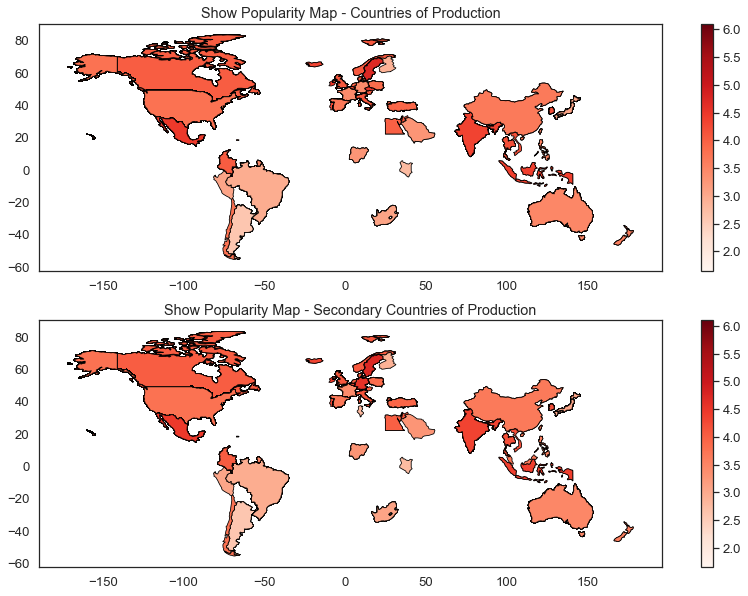

In [1407]:
# Plot the map
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
merged_data.plot(column='Value', cmap='Reds', linewidth=0.8, ax = ax1, edgecolor='black', legend=True)
merged_data1.plot(column='Value', cmap='Reds', linewidth=0.8, ax = ax2, edgecolor='black', legend=True)

# Add title and show the plot
ax1.set_title('Show Popularity Map - Countries of Production')
ax2.set_title('Show Popularity Map - Secondary Countries of Production')

plt.show()

There is not so much difference, it's probably because many shows were produced in a single country and I had to pass them as values also for the second_country column.

Interestingly, countries like Canada, Mexico, India, Germany, Italy, and Sweden have a better performance of popularity. India, Mexio and Sweden and Germany are rising

It is a good time for heatmap.

## 2.5.7 Heatmaps (Before and After Pandemic) <a id= '2.5.7_Heatmaps_(Before_and_After_Pandemic)'><a>

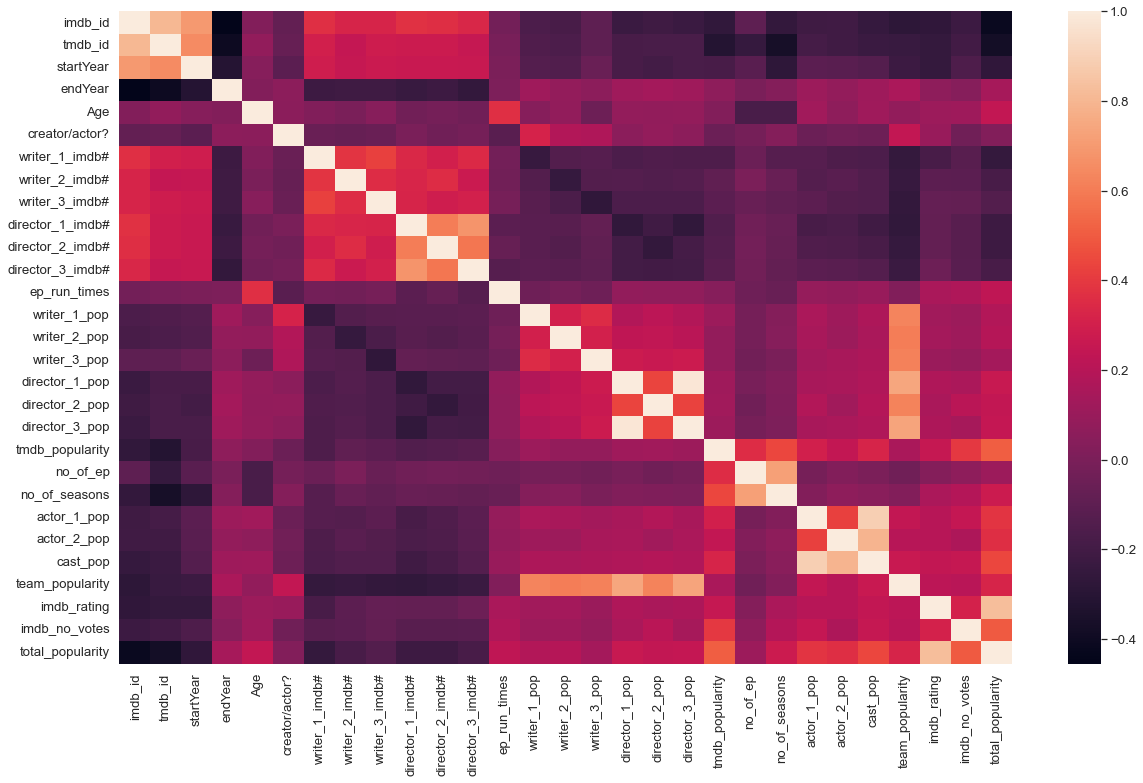

In [1408]:
plt.figure(figsize=(20,12))
sns.heatmap (tv_df.corr());


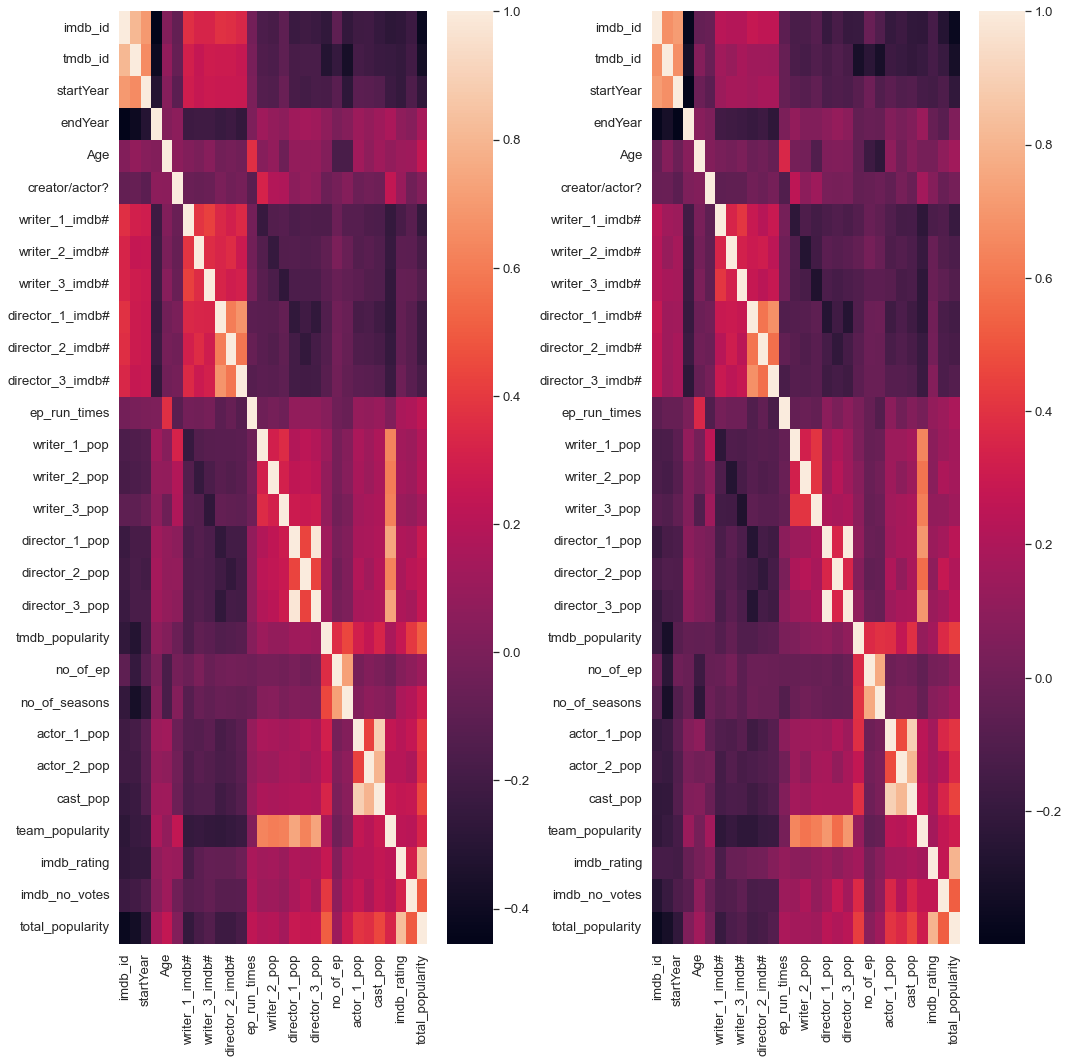

In [1409]:
#let's do it for the last five years, COVID times (2020-2022) and Post COVID-19.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
sns.heatmap (tv_df.corr(), ax = ax1);
sns.heatmap (last_five_years.corr(), ax = ax2);
plt.tight_layout()
plt.show()

By comparing these two heatmaps I can conclude that the popularity of the shows became even less predictable as the effects of the features are shown less in the last five years. 

<AxesSubplot:>

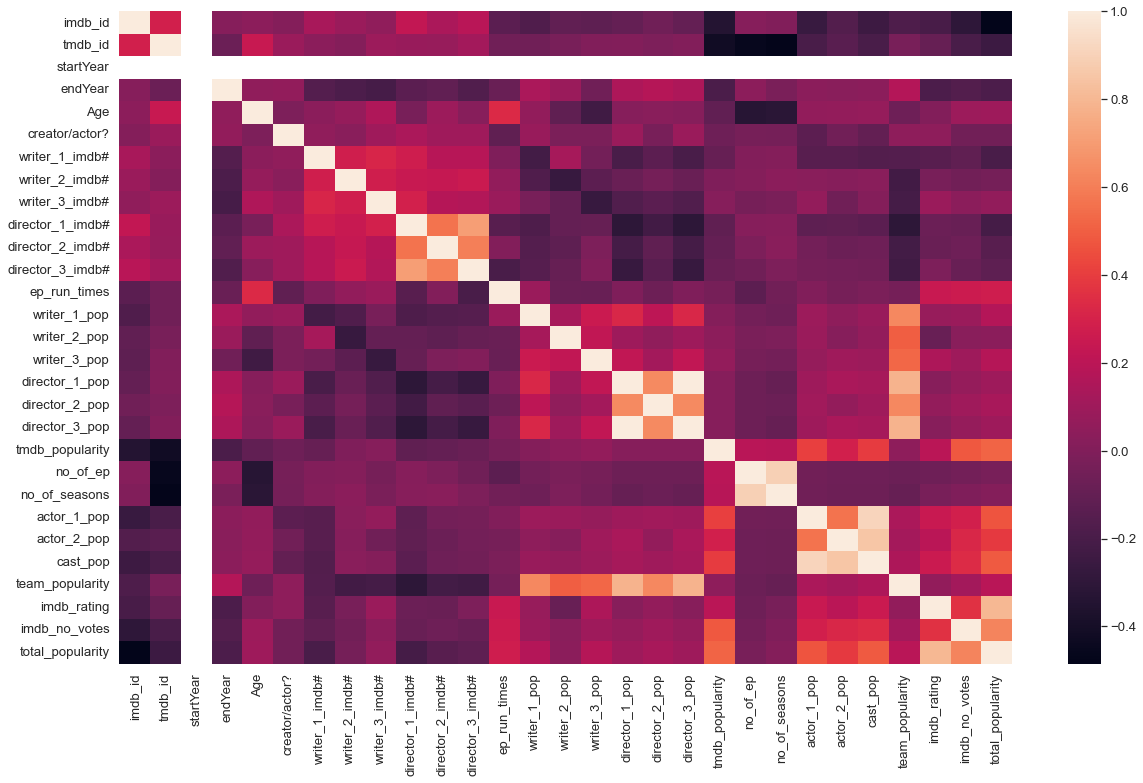

In [1410]:
#Checking 2020,2021 (COVID TIMES)
plt.figure(figsize=(20,12))
sns.heatmap (tv_df[tv_df['startYear'] == 2020 |  2021]  .corr())


By looking at this COVID map, we can clearly see how companies went for famous writers and directors during COVID times to have less risky productions.  There is a stronger connection between the popularity of writers and directors here.

There is also an undeniable correlation between episode run times and multiple features including total popularity. Perhaps we can investigate more. 

In [1411]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'total_popularity', data=tv_df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Popularity')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

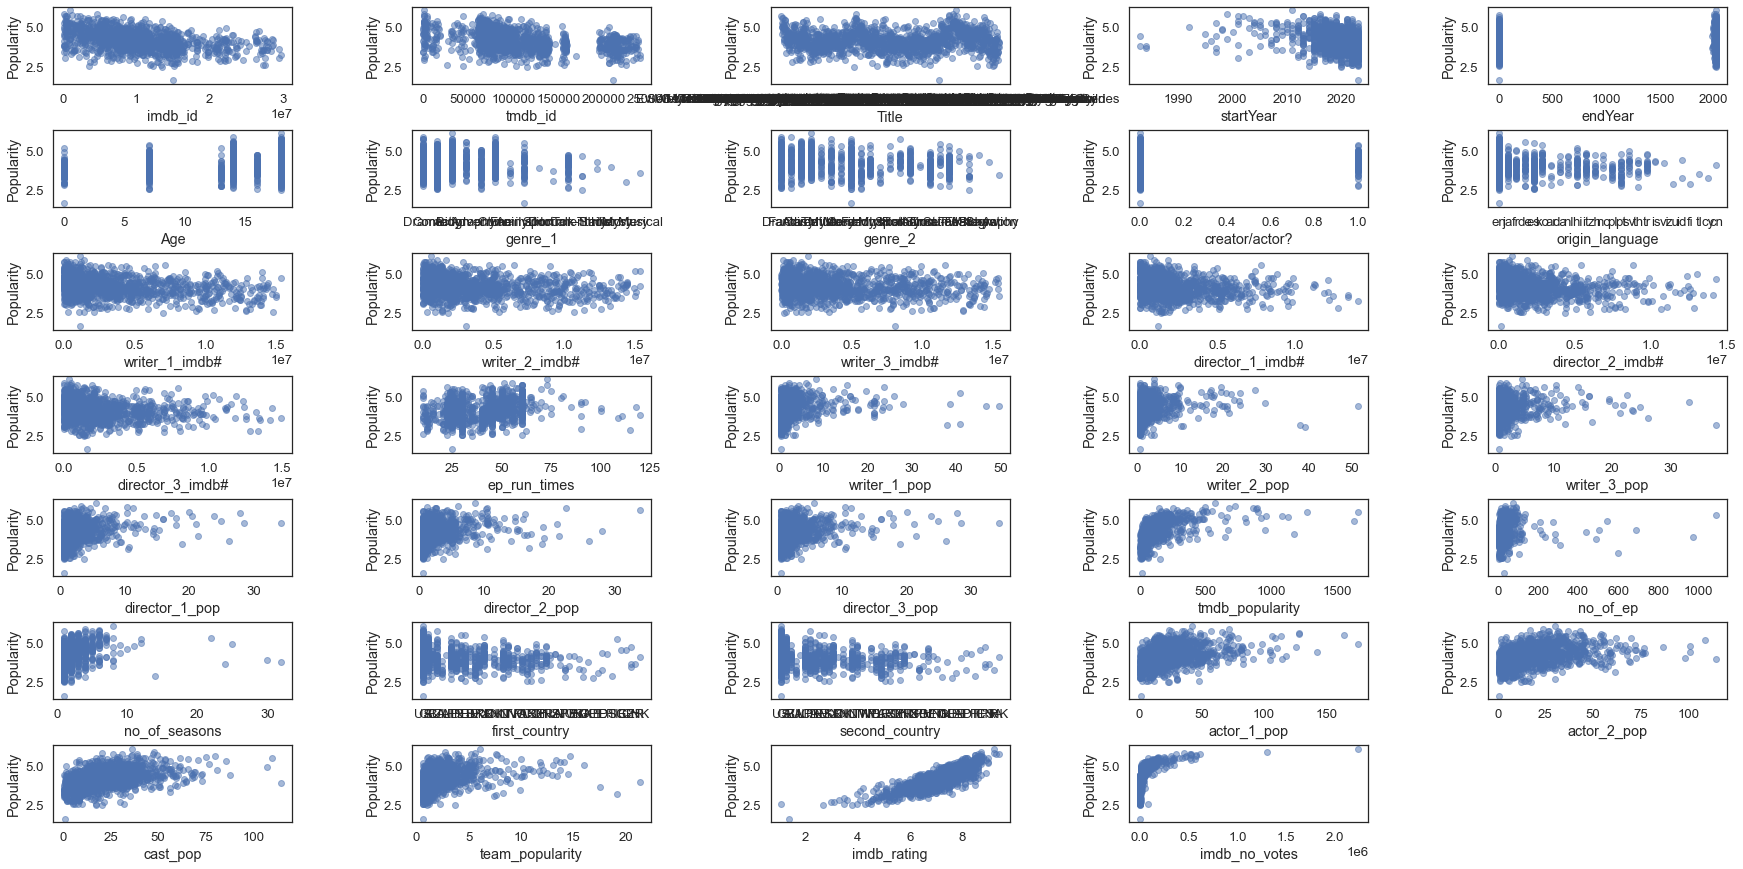

In [1412]:
features = [f for f in tv_df.columns if f not in ['total_popularity', 'titleType',
            'director_1_name', 'director_2_name', 'director_3_name', 'writer_1_name', 'writer_2_name', 'originalTitle','Streamer','writer_3_name', 'actor_1_name', 'actor_2_name']]
scatterplots(features, ncol=5, figsize=(30, 15))

Actor or director popularity don't really affect that much unlike writers. Writers seem to be the stars of the show and the real dealbreakers. As we investigated before, higher age rating means more popularity except for children's programs that are for under or above 7 years.

## 2.5.8 Running Times <a id= '2.5.8_Running_Times' ><a>

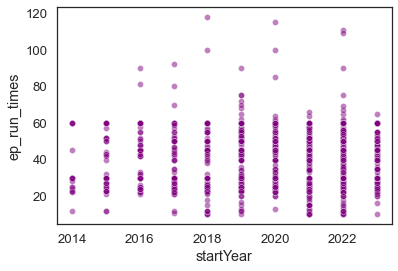

In [1413]:
sns.scatterplot(data=last_ten_years, x='startYear', y='ep_run_times', 
                color = 'purple', alpha = 0.5, legend = False)
plt.show()

Well, the reason why ep_run_times stood up it was because there were several 'special shows' with runtimes over conventional tv show runtimes (20 min, 30 min or 60 min). So their popularity was evidently low. That being said, starting with 2019 there are more content under 20 min which wasn't a trend during the Free Network/Cable TV times. Curious if those shows are animation (because they are harder to make, and producing a 5 min animation can take ages. Let's see!)

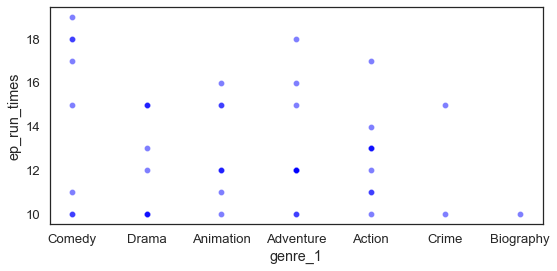

In [1414]:
#looking at the shows under 20 min in the last 20 years
last_10yr_under_20 = last_ten_years[last_ten_years['ep_run_times']< 20]
plt.figure(figsize = (8, 4))
sns.scatterplot(data=last_10yr_under_20 , x='genre_1', y='ep_run_times', 
                color = 'blue', alpha = 0.5,  legend = False)
plt.tight_layout()
plt.show()


Actually Action and Comedy are above animation by one show and Adventure works for under 20 minutes as well.

## 2.5.9 Languages <a id = '2.5.9_Languages'><a>

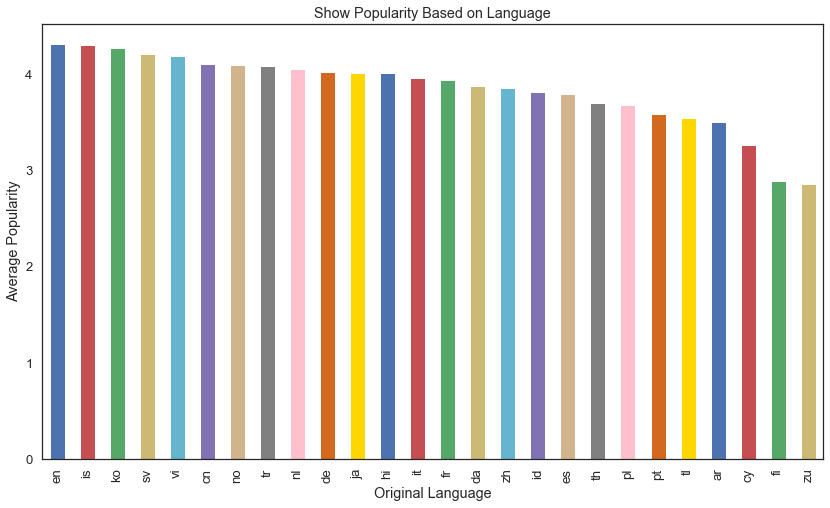

In [1415]:
from itertools import cycle, islice

Top_lang = tv_df.groupby('origin_language')['total_popularity'].mean()
Top_lang.sort_values(ascending = False, inplace = True)
plt.figure(figsize=(14,8))
colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm', 
                              'tan', 'grey', 'pink', 'chocolate', 'gold']), None, len(Top_lang)))

Top_lang.plot(kind = 'bar',color = colors)
_=plt.xlabel('Original Language')
_ = plt.ylabel('Average Popularity')
_ = plt.title('Show Popularity Based on Language')

English(en), Swedish(sv), Icelandic(is), Korean(ko), Portugues(pt)and Vietnamese(vi) shows seem to great biggest buzzes. They are later followed by Turkish(tr), Japanese(ja), Dutch(nl), Norwegian, Danish(da), Chinese - Cantonese (cn) and German (de) come next.

Icelandic shows draw my attention since their population is only around 300k people.

In [1416]:
Top_lang

origin_language
en    4.311316
is    4.305000
ko    4.273056
sv    4.210833
vi    4.190000
cn    4.110000
no    4.096000
tr    4.088000
nl    4.060000
de    4.025333
ja    4.015270
hi    4.014000
it    3.961250
fr    3.936667
da    3.882500
zh    3.856364
id    3.820000
es    3.790000
th    3.696250
pl    3.682308
pt    3.586667
tl    3.540000
ar    3.508000
cy    3.260000
fi    2.890000
zu    2.860000
Name: total_popularity, dtype: float64

In [1417]:
tv_df['origin_language'].unique()

array(['en', 'ja', 'fr', 'de', 'es', 'ko', 'ar', 'da', 'nl', 'hi', 'it',
       'zh', 'no', 'pl', 'pt', 'sv', 'th', 'tr', 'is', 'vi', 'zu', 'id',
       'fi', 'tl', 'cy', 'cn'], dtype=object)

Let's check the popularity of languages in the last 10 years to see if there is inclination towards any new language.

In [1418]:
    #Filter the dataset for the last 5 years
average_popularity_by_language = last_five_years.groupby('origin_language')['total_popularity'].mean().reset_index()
# now without last five years
wo_last_5_years = tv_df[tv_df['startYear'] <= tv_df['startYear'].max() - 4]



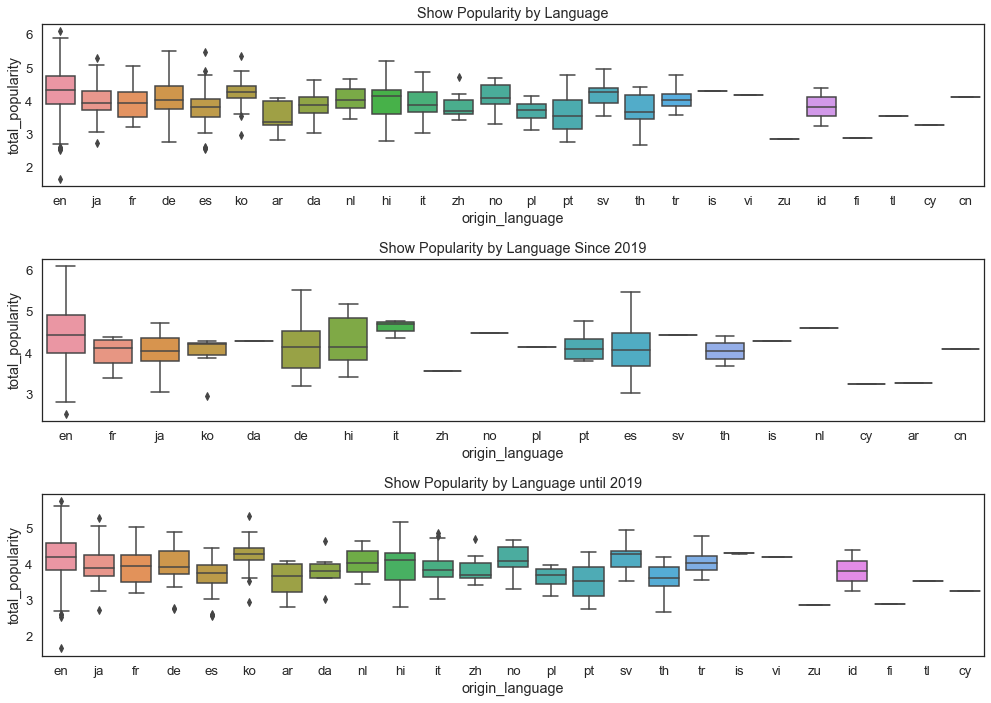

In [1419]:
# Plot the two plots looking at the language for 30 years and then for 5 years
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14, 10))
sns.boxplot(data=tv_df, x='origin_language', y='total_popularity', ax = ax1)
sns.boxplot(data= wo_last_5_years, x='origin_language', y='total_popularity', ax = ax2)
sns.boxplot(data= last_five_years, x='origin_language', y='total_popularity', ax = ax3)

ax1.set_title("Show Popularity by Language")
ax2.set_title("Show Popularity by Language Since 2019")
ax3.set_title("Show Popularity by Language until 2019")

plt.tight_layout()
plt.show()

In the last five years, there is a great increase in the production of foreign tv shows. Korean shows are made less but certainly tend to become more popular compared to others.

Icelandic shows draw my attention since their population is around 372k people. And they have few shows but they make sure to make those shows shine.

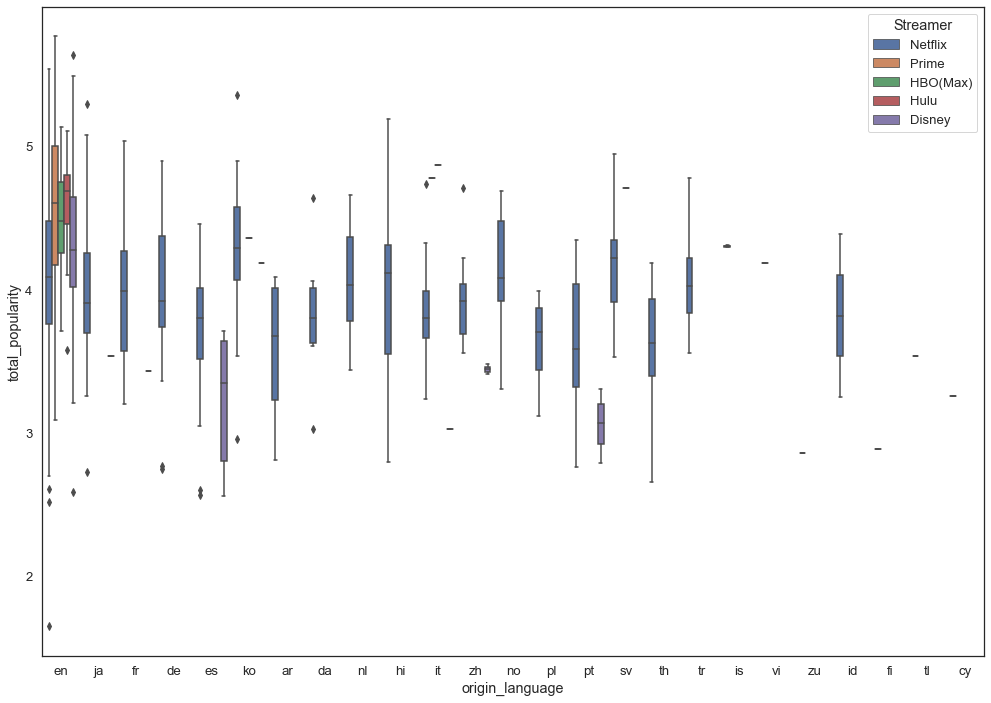

In [1420]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

sns.boxplot(data= last_five_years, x='origin_language', y='total_popularity', hue = 'Streamer', ax = ax)
plt.tight_layout()

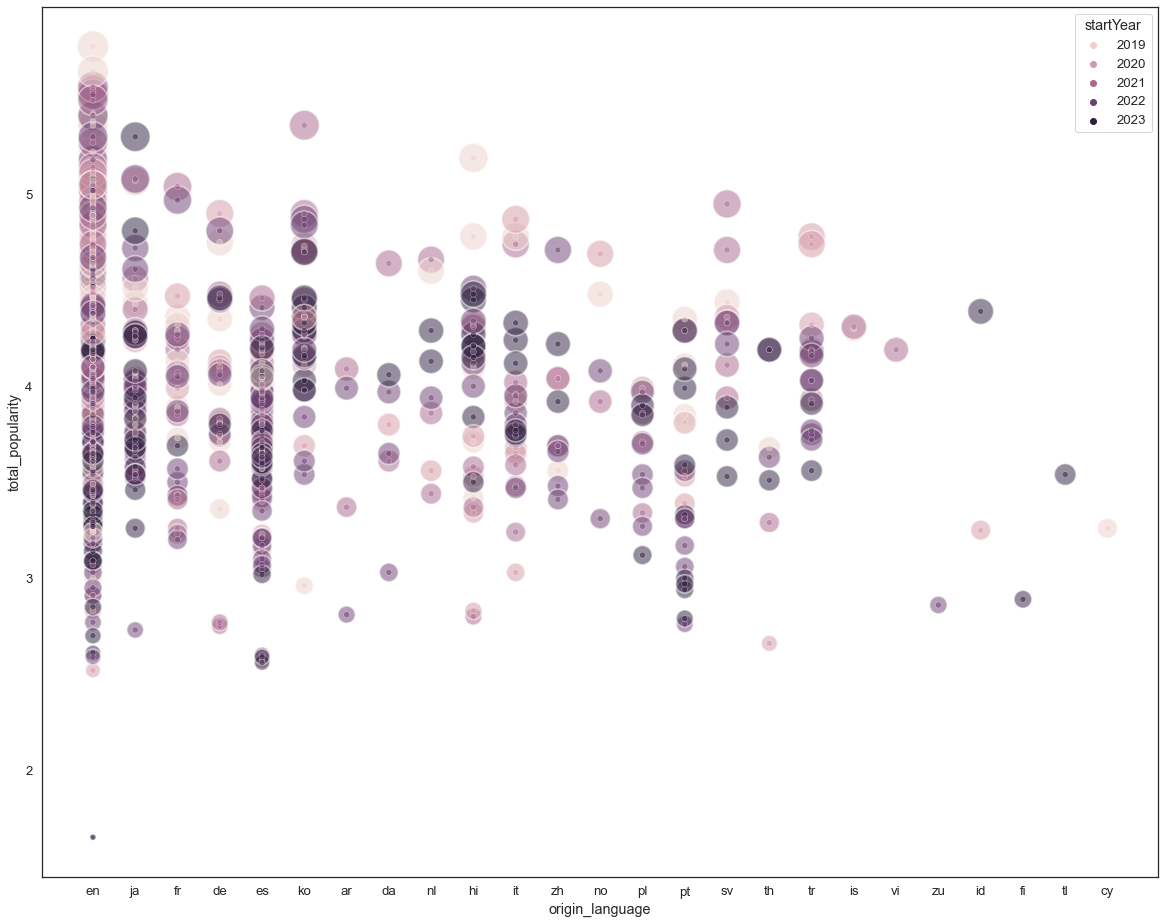

In [1421]:
plt.figure(figsize=(20,16))

ax = sns.scatterplot(data=last_five_years, x='origin_language', y='total_popularity', 
                     size = 'total_popularity', sizes = (20, 1000), alpha = 0.5,
                     hue='startYear', legend = False)

ax2 = sns.scatterplot(data=last_five_years, x='origin_language', y='total_popularity', 
                      alpha = 0.5, hue='startYear')


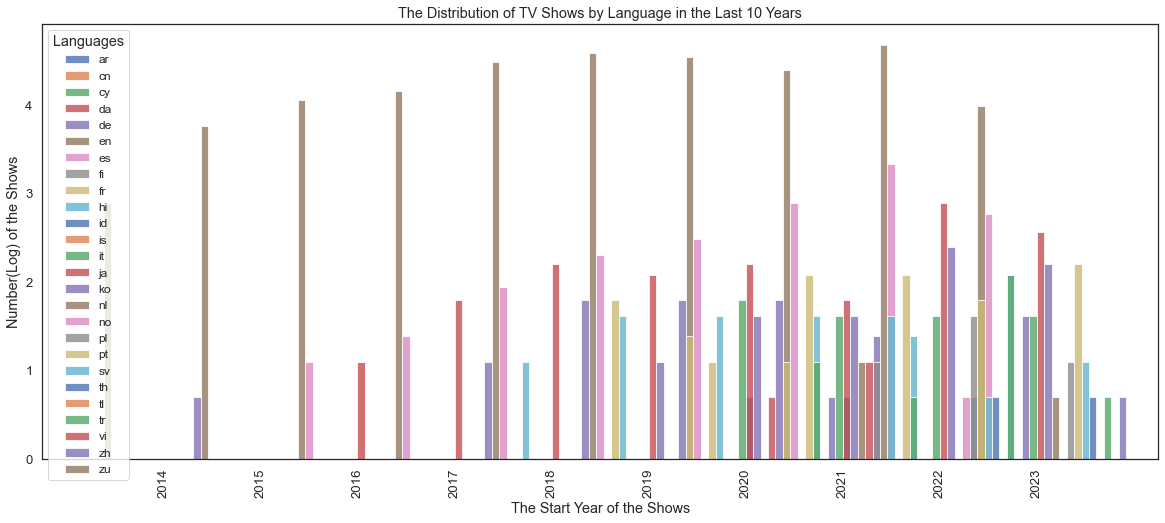

In [1422]:
# Group by 'year' and 'genre', then calculate the average total_popularity
show_count_by_language = last_ten_years.groupby(['startYear', 'origin_language'])['total_popularity'].count().reset_index()
show_count_by_language.rename(columns={'total_popularity': 'show_count'}, inplace = True)

#taking the log to make the difference less
show_count_by_language['show_count'] = np.log (show_count_by_language['show_count'])
# Pivoting the table 
pivot_table2 = show_count_by_language.pivot(index='startYear', columns='origin_language', values='show_count')

# Plot the bar plot
pivot_table2.plot(kind='bar', figsize=(20, 8), width = 2, alpha = 0.8)

plt.title('The Distribution of TV Shows by Language in the Last 10 Years')
plt.legend(loc='upper left', title="Languages", fontsize='small', fancybox=True)
plt.xlabel('The Start Year of the Shows')
plt.ylabel('Number(Log) of the Shows')

plt.show()

Finally I would like to look at the profile of iceland more by checking the genres they are working on.

## 2.5.10 Case Study: Iceland<a id = '2.5.10_Case_Study:_Iceland'><a>

<Figure size 864x576 with 0 Axes>

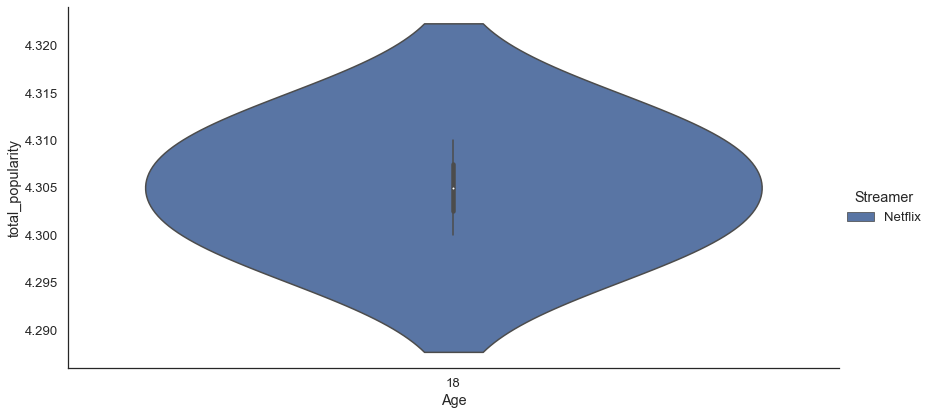

In [1423]:
last_ten_years_iceland = pd.DataFrame(last_ten_years[last_ten_years['origin_language'] == 'is'])
plt.figure(figsize=(12, 8))
sns.catplot(
    data=last_ten_years_iceland, x="Age", y="total_popularity", hue="Streamer", kind="violin",height=6, aspect=2

)
plt.show()

Wow, okay, did not expect this. So Netflix goes for the +18 shows from iceland. That's a one big violin shaped balloon!

<AxesSubplot:xlabel='Streamer'>

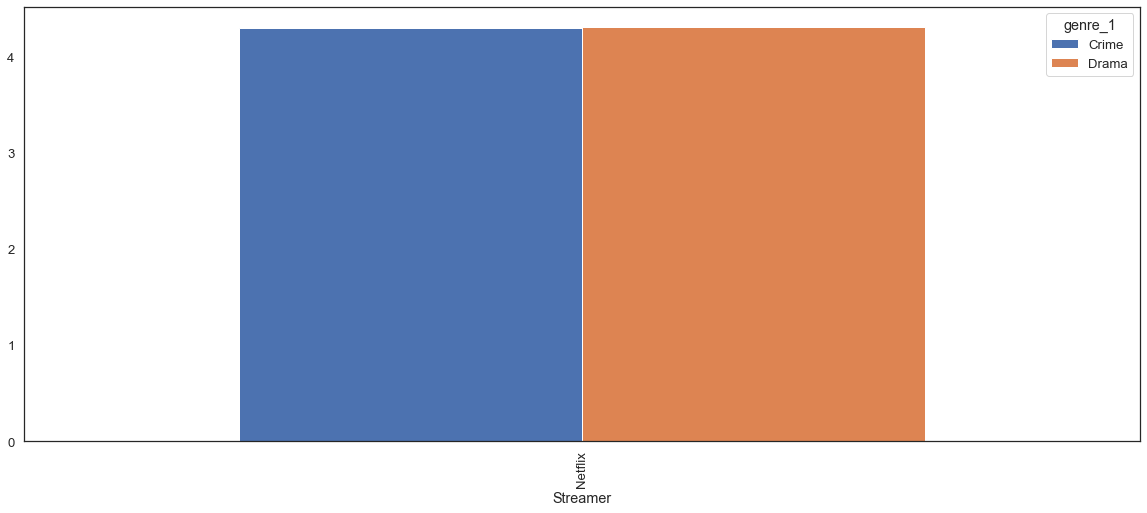

In [1424]:
pivot_table = last_ten_years_iceland.pivot(index='Streamer', columns='genre_1', values='total_popularity')

pivot_table.plot(kind='bar', figsize=(20, 8), width = 0.8)


<AxesSubplot:xlabel='Streamer'>

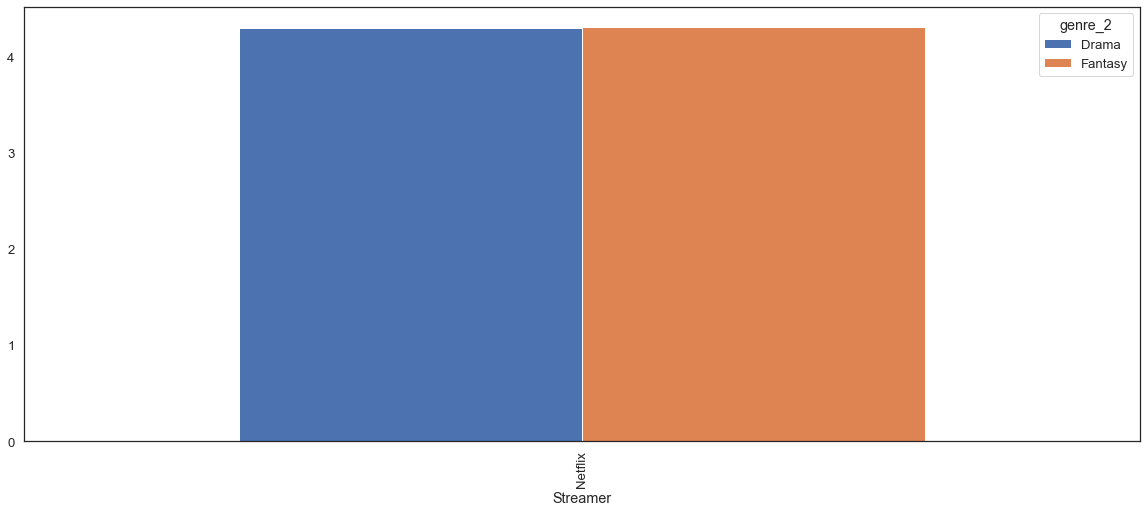

In [1425]:
# checking 2nd genre
pivot_table = last_ten_years_iceland.pivot(index='Streamer', columns='genre_2', values='total_popularity')

pivot_table.plot(kind='bar', figsize=(20, 8), width = 0.8)

So basically, Netflix go for Crime/Dramas in Iceland for +18 audience.

Finally I'll check France since Gaumont is a French company

<Figure size 864x576 with 0 Axes>

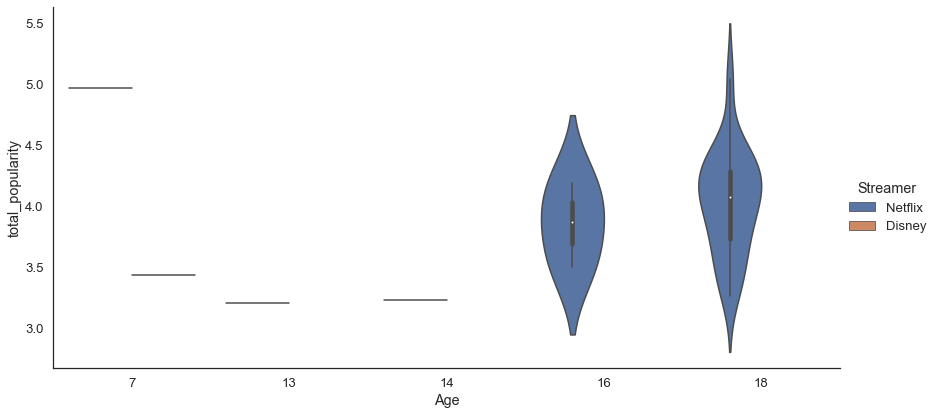

In [1426]:
#last 10 years in France
last_ten_years_france = pd.DataFrame(last_ten_years[last_ten_years['origin_language'] == 'fr'])
plt.figure(figsize=(12, 8))
sns.catplot(
    data=last_ten_years_france, x="Age", y="total_popularity", hue="Streamer", kind="violin",height=6, aspect=2

)
plt.show()

## 2.5.11 Case Study: France<a id = '2.5.10_Case_Study:_France'><a>

<Figure size 864x576 with 0 Axes>

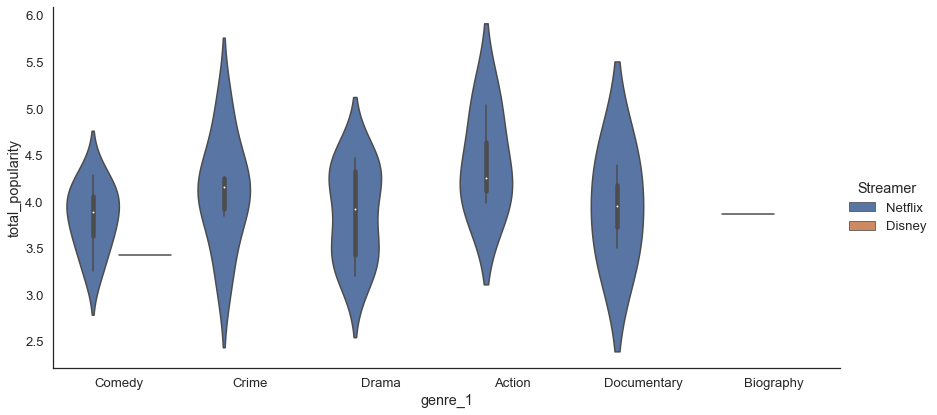

In [1427]:
last_ten_years_france = pd.DataFrame(last_ten_years[last_ten_years['origin_language'] == 'fr'])
plt.figure(figsize=(12, 8))
sns.catplot(
    data=last_ten_years_france, x="genre_1", y="total_popularity", hue="Streamer", kind="violin",height=6, aspect=2

)
plt.show()

<Figure size 576x288 with 0 Axes>

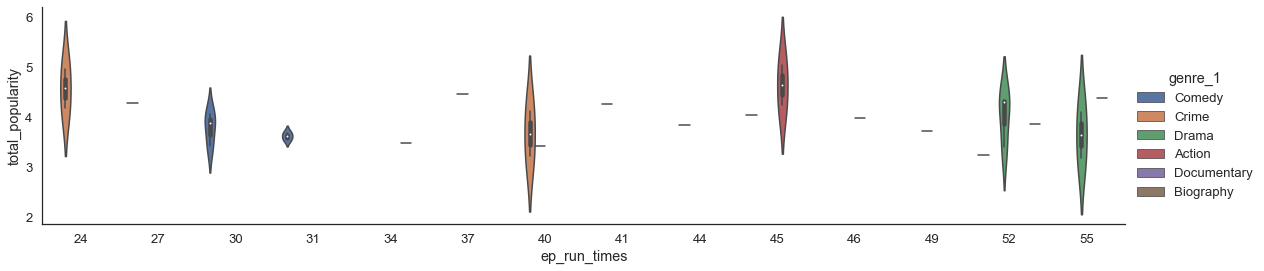

In [1428]:
# for genre 1
last_ten_years_france = pd.DataFrame(last_ten_years[last_ten_years['origin_language'] == 'fr'])
plt.figure(figsize=(8, 4))
sns.catplot(
    data=last_ten_years_france, x="ep_run_times", y="total_popularity", hue="genre_1", kind="violin",height=4, aspect=4

)
plt.show()

I would not predict that crime shows under 30 min work so well along with action shows with RT 40-60 min. Let's see what they are...

In [1429]:
last_ten_years_france[last_ten_years_france['genre_1'] == 'Crime']

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
137,13655456,104399,True Story,tvMiniSeries,2021,2021,Netflix,16,Crime,Drama,...,FR,2.7,2.0,Bilal Hassani,Nathalie Odzierejko,2.4,1.3,7.4,20183,4.19
217,10986052,93888,Criminal: France,tvMiniSeries,2019,2019,Netflix,18,Crime,Drama,...,FR,12.6,8.2,Margot Bancilhon,Anne Azoulay,10.4,0.7,7.2,4542,4.13
220,14252964,128068,Gone for Good,tvMiniSeries,2021,2021,Netflix,18,Crime,Drama,...,FR,14.2,8.3,Finnegan Oldfield,Nicolas Duvauchelle,11.3,4.2,6.3,4841,3.85
571,14078186,121011,Under Suspicion: Uncovering the Wesphael Case,tvSeries,2021,2021,Netflix,14,Crime,Documentary,...,BE,0.6,0.6,Bernard Wesphael,Bernard Wesphael,0.6,0.8,6.3,822,3.23
653,14140886,195928,The 7 Lives of Lea,tvSeries,2022,2022,Netflix,18,Crime,Drama,...,FR,1.8,4.7,Raïka Hazanavicius,Khalil Ben Gharbia,3.3,0.6,7.5,5001,4.27
785,22297578,65334,Cat,tvSeries,2022,0,Netflix,7,Crime,Drama,...,FR,12.7,12.3,Annouck Hautbois,Benjamin Bollen,12.5,0.8,8.2,12552,4.97


I'll see if that's the case around the world:

<Figure size 576x288 with 0 Axes>

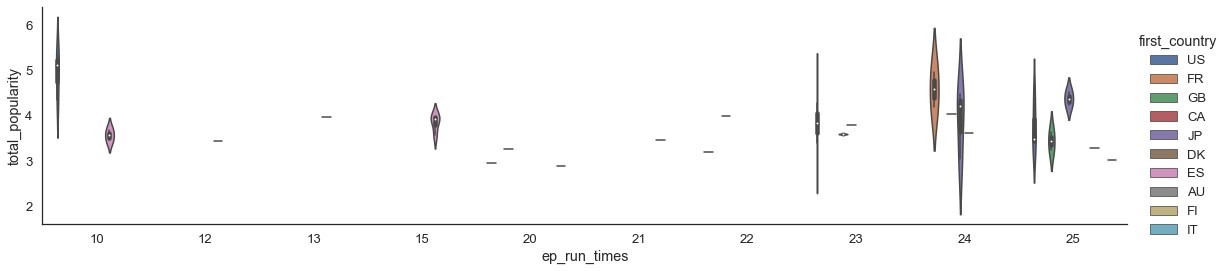

In [1430]:
# for genre 1
last_10yr_under_30 = pd.DataFrame(last_ten_years[(last_ten_years['ep_run_times']<= 25) & (last_ten_years['genre_1']>= 'Crime')])
plt.figure(figsize=(8, 4))
sns.catplot(
    data=last_10yr_under_30, x="ep_run_times", y="total_popularity", hue ='first_country', kind="violin",height=4, aspect=4

)
plt.show()

France, USA, Britain, and Japan focus on Crime shows under 25  min.

## 2.5.12 Shows with Creators Also Acting<a id = '2.5.12_Shows_with_Creators_Also_Acting'><a>

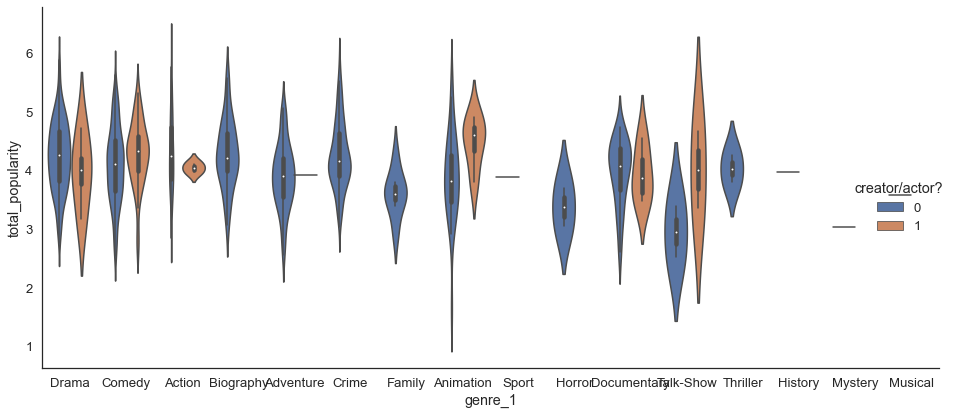

In [1431]:
creator_actor_pop = pd.DataFrame(tv_df.groupby('creator/actor?')['total_popularity'].mean())
sns.catplot(
    data=tv_df, x="genre_1", y="total_popularity", hue="creator/actor?", kind="violin",height=6, aspect=2

)
plt.tight_layout()
plt.show()

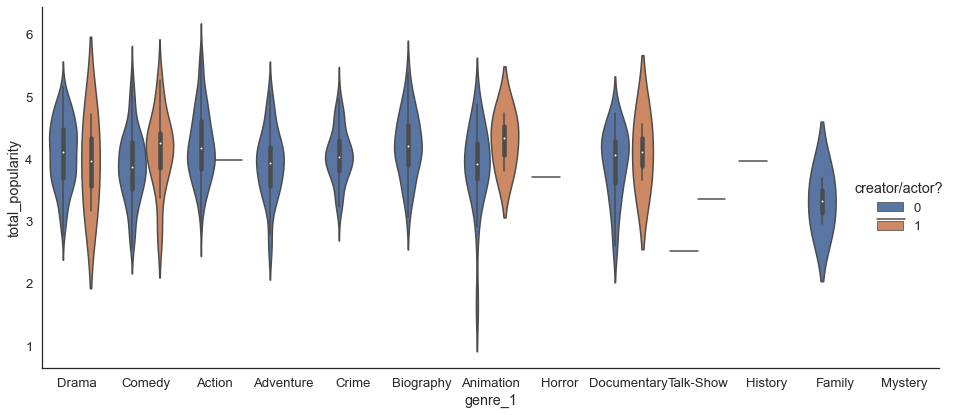

In [1432]:
sns.catplot(
    data=last_five_years, x="genre_1", y="total_popularity", hue="creator/actor?", kind="violin",height=6, aspect=2

)
plt.tight_layout()
plt.show()

Animation and documentaries score well when they are created by the people who are also subjects of their contents. Drama and comedy, on the other hand, might flop (popularity of 2 out of 6)

Finally, let's finish up with the comparison of netflix stocks with their show popularity, to get a sense of the whole industry.

## 2.6 Netflix Show Popularity and Netflix Stock Prices <a id = '2.6_Netflix_Show_Popularity_and_Netflix_Stock_Prices'><a>                          

In [1441]:
last_five_years['startYear'].astype('float').astype('Int64')


28      2019
29      2019
30      2019
31      2019
32      2019
        ... 
1233    2022
1234    2022
1235    2022
1236    2023
1237    2023
Name: startYear, Length: 818, dtype: Int64

In [1442]:
n_popularity = last_five_years[last_five_years['Streamer'] == 'Netflix'].groupby('startYear')['total_popularity'].mean()
n_popularity_df = pd.DataFrame(n_popularity)

n_popularity_df = n_popularity.reset_index()
n_popularity_df

,startYear,total_popularity
0,2019,4.150000
1,2020,4.041290
2,2021,4.029118
3,2022,3.904211
4,2023,3.912000


In [1443]:
years = n_popularity_df['startYear'].tolist()
ave_pop =  n_popularity_df['total_popularity'].tolist()
n_stock_dates = n_stocks_df['Date'].tolist()
n_stocks_log_highs = np.log(n_stocks_df['High'].tolist())

In [1444]:
n_stocks_log_highs

array([5.88290449, 5.91752192, 5.93753621, 5.95272369, 5.95581144,
       5.92692603, 5.95261979, 5.7947803 , 5.7089358 , 5.73253189,
       5.75833381, 5.8230459 , 5.88568729, 5.97368241, 5.97513186,
       6.10818032, 6.12898485, 6.16122844, 6.3550133 , 6.30817126,
       6.3232652 , 6.34999525, 6.25138348, 6.30170281, 6.38568328,
       6.33974187, 6.32254727, 6.3342738 , 6.25180756, 6.28437668,
       6.32353421, 6.34472363, 6.42810527, 6.53809637, 6.55249361,
       6.48390217, 6.41344255, 6.12791669, 5.98267604, 5.98146469,
       5.31998103, 5.33455288, 5.44133487, 5.52938942, 5.52341902,
       5.72237524, 5.74527621, 5.8073013 , 5.91085081, 5.93867011,
       5.84597623, 5.85736153, 6.0041586 , 6.10624306, 6.18414889,
       6.09863592, 6.11688504, 6.03748898, 6.17939537, 6.21638655,
       6.22140496])

<Figure size 720x576 with 0 Axes>

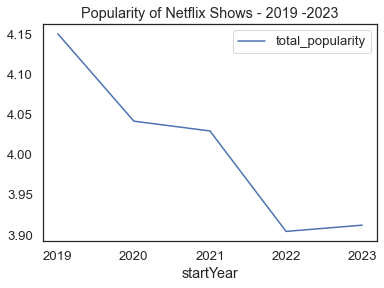

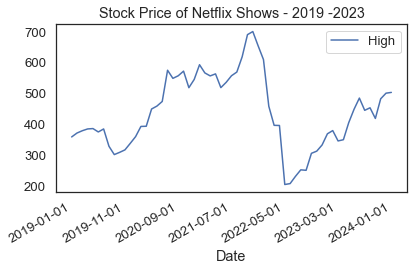

In [1445]:
plt.figure(figsize = (10,8))
ax1=n_popularity_df.plot('startYear' , 'total_popularity')
ax2=n_stocks_df.plot('Date', 'High')
ax1.set_title('Popularity of Netflix Shows - 2019 -2023')
ax2.set_title('Stock Price of Netflix Shows - 2019 -2023')
plt.gcf().autofmt_xdate()


plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

The popularity of Netflix Shows do have a correlation with the Netflix stock prices to an extent. When the average popularity of shows go high it doesn't necessarily make the stock prices go up as drastically as the popularity. 

However, when the popularity drops drastically, the stock prices mimic that for a certain time. (ie. years 2021-2022, as well as 2019-2020)

Although the popularity goes up persistently, the stock prices go up at a slower velocity. The stock prices sometimes go up when the popularity go down slowly, that might be because of Netflix' great algorithms that target the right audience very accurately although the number of viewers might be low. The great number of productions let Netflix survive the results of their sometimes-mediocre shows with mediocre popularity scores. 

## 2.7 Summary <a id='2.7_SUMMARY'><a>

In this study, multiple factors were found to be correlated to the popularity of shows. Besides the obvious features, such as team popularity and imdb ratings, ep_run_times, older age ratings and serious genres such as Crime and Drama were important factors.

Netflix's golden country of crime dramas, Iceland, come up with great popularity scores although the numbers of shows produced for this small country is limited. There are very successful Icelandic crime dramas. 

It was also interesting to discover that there are many shows under 30 min that are not comedies. Also these features seem to be less correlated in recent years, which doesn't make the lives of the producers who are determingin their tv show slate easier.

Despite this fact, Gaumont, which is co-owners of the great Netflix show, 'Narcos', can surely consider developing shows in regions with less populations if those regions are 'trendy' in certain genres of shows.  That's the only way to explain why countries such as Sweden, Iceland and Canada which have much less population than USA, INDIA can receive high popularity.

Finally, during pandemic the streamers seem to stick with the big shots as key team people and they made big name directors collaborating more with big name directors. Other than that, writers' popularity (aka 'success') do matter the most among team variables in the overall popularity of the show. 

Let's move onto the preprocessing and modeling!